In [1]:
# Import necessary packages

import numpy as np
import opendssdirect as dss
# from utils.device.Inverter import Inverter
# from utils.controller.AdaptiveInvController import AdaptiveInvController
# from utils.controller.FixedInvController import FixedInvController
import matplotlib.pyplot as plt
from math import tan,acos
import copy
import pandas as pd
import time

from collections import deque
import signal_processing as signal_processing

# import numpy as np
# from matplotlib.mlab import PCA
# from sklearn.decomposition import PCA

import scipy.linalg as spla

In [2]:
# Set global variables and parameters, and test OpenDSS with network


#######################################################
###Global variable initialization and error checking###
#######################################################

# Sbase=1
# LoadScalingFactor = 3
# GenerationScalingFactor = 5
SlackBusVoltage = 1.00
# NoiseMultiplyer= 1
# #Set simulation analysis period - the simulation is from StartTime to EndTime
# StartTime = 40600
# EndTime = StartTime + 640
# EndTime += 1 # creating a list, last element does not count, so we increase EndTime by 1
# #Set hack parameters
# TimeStepOfHack = 160
# PercentHacked = np.array([0,0,0,0,0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0])

#Set initial VBP parameters for uncompromised inverters
# VBP_normal=np.array([0.97, 1, 1, 1.03, 1.06])
# VBP_attack=np.array([0.997, 1, 1, 1.003, 1.007])

#Set delays for each node
# Delay_VBPCurveShift = (30+2*np.random.randn(31)).astype(int)
# #Delay_VBPCurveShift = (10+2*np.random.randn(31)).astype(int)
# lpf_meas_vector = (1+0.2*np.random.randn(31))
# lpf_output_vector= (0.1+0.015*np.random.randn(31))

#Set observer voltage threshold
# ThreshHold_vqvp = 0.06
# adaptive_gain=800

# power_factor=0.9
# pf_converted=tan(acos(power_factor))


#Error checking of the global variable -- TODO: add error handling here!
# if EndTime < StartTime or EndTime < 0 or StartTime < 0:
#     print('Setup Simulation Times Inappropriately.')
# if NoiseMultiplyer < 0:
#     print('Setup Noise Multiplyer Correctly.')

# Select OpenDSS file
dss.run_command('Redirect IEEE_13_Node/ieee_13_bus_osc_reg.dss')

# Solve power flow with OpenDSS file
dss.Solution.Solve()
if not dss.Solution.Converged():
    print('Initial Solution Not Converged. Check Model for Convergence')
else:
    print('Initial Model Converged. Proceeding to Next Step.')
    #Doing this solve command is required for GridPV, that is why the monitors
    #go under a reset process
    dss.Monitors.ResetAll()
    
    #set solution Params
    #setSolutionParams(dss,'daily',1,1,'off',1000000,30000)
    dss.Solution.Mode(1)
    dss.Solution.Number(1)
    dss.Solution.StepSize(1)
    dss.Solution.ControlMode(-1)
    dss.Solution.MaxControlIterations(1000000)
    dss.Solution.MaxIterations(50000)
    #Easy process to get all names and count of loads, a trick to avoid
    #some more lines of code
    TotalLoads=dss.Loads.Count()
    AllLoadNames=dss.Loads.AllNames()
    print('OpenDSS Model Compliation Done.')

print('')

# Print number of buses, and bus names
print('Number of Buses: ' + str(len(dss.Circuit.AllBusNames())))
print('Buses: ' + str(dss.Circuit.AllBusNames()))

# Print number of line, and line names
print('Number of Lines: ' + str(len(dss.Lines.AllNames())))
print('Lines: ' + str(dss.Lines.AllNames()))

# Print number of loads, and load names
print('Number of Loads: ' + str(len(dss.Loads.AllNames())))
print('Loads: ' + str(dss.Loads.AllNames()))

print('')

# Print different voltage measurements
for k1 in range(len(dss.Circuit.AllBusNames())):
    if dss.Circuit.AllBusNames()[k1] == 'sourcebus':
        dss.Circuit.SetActiveBus(dss.Circuit.AllBusNames()[k1])
        
        print(dss.Circuit.AllBusNames()[k1])
        print('BASE - LN')
        print(dss.Bus.kVBase())
        print('VMAGANGLE - LN POLAR')
        print(dss.Bus.VMagAngle())
        print('puVMAGANGLE - LN POLAR')
        print(dss.Bus.puVmagAngle())
        print('VOTLAGES - LN CARTESIAN')
        print(dss.Bus.Voltages())
        print('puVOTLAGES - LN CARTESIAN')
        print(dss.Bus.PuVoltage())
        print('VLL - LL CARTESIAN')
        print(dss.Bus.VLL())
        print('puVLL - LL CARTESIAN')
        print(dss.Bus.puVLL())
        
        tempvoltage = dss.Bus.Voltages()
        
        Vab = tempvoltage[0]
        
print('')
        
for k1 in range(len(dss.Circuit.AllBusNames())):
    dss.Circuit.SetActiveBus(dss.Circuit.AllBusNames()[k1])
    print(dss.Circuit.AllBusNames()[k1])
    print('BASE - LN')
    print(dss.Bus.kVBase())
    print('VMAGANGLE - LN POLAR')
    print(dss.Bus.VMagAngle())
    print('puVMAGANGLE - LN POLAR')
    print(dss.Bus.puVmagAngle())
    print('')

    
# for k1 in range(len(AllLoads)):
#     dss.Loads.Name(AllLoads[k1])
#     print(dss.Loads.Name())
#     print(dss.CktElement.NodeOrder())
#     print(dss.Loads.kW())
#     print(dss.Loads.kvar())    
#     print(dss.Loads.kV())
#     print(dss.Loads.kVABase())

for k1 in range(len(dss.RegControls.AllNames())):
    print(dss.RegControls.AllNames()[k1])
    dss.RegControls.Name(dss.RegControls.AllNames()[k1])
    print(dss.RegControls.TapNumber())
    print('')


Initial Model Converged. Proceeding to Next Step.
OpenDSS Model Compliation Done.

Number of Buses: 16
Buses: ['sourcebus', '650', 'rg60', '633', '634', '632', '670', '671', '680', '645', '646', '692', '675', '684', '611', '652']
Number of Lines: 12
Lines: ['line_650_632', 'line_632_670', 'line_670_671', 'line_671_680', 'line_632_633', 'line_632_645', 'line_645_646', 'line_692_675', 'line_671_684', 'line_684_611', 'line_684_652', 'line_671_692']
Number of Loads: 16
Loads: ['load_671', 'load_634a', 'load_634b', 'load_634c', 'load_645', 'load_646', 'load_692', 'load_675a', 'load_675b', 'load_675c', 'load_611', 'load_652', 'load_670a', 'load_670b', 'load_670c', 'load_670ab']

sourcebus
BASE - LN
66.39528095680697
VMAGANGLE - LN POLAR
[66393.74394405636, 29.992841412114068, 66394.74741020941, -90.00890448279158, 66392.49358461527, 149.99121848059406]
puVMAGANGLE - LN POLAR
[0.9999768505723833, 29.992841412114068, 0.9999919640885638, -90.00890448279158, 0.9999580185195163, 149.9912184805940

In [3]:
# Inverter object class

class inverter():
    
    # Initialize
    def __init__(self):
                
        self.reactive_power = 0 # current reactive power
    
        
        self.VBP = np.array([0.97, 0.99, 1.01, 1.03]) # Volt-VAr curve breakpoints
        
        
        self.wlp = 2*np.pi*2.0 # lowpass filter cutoff frequency        
        
        self.Ts = 1.0 # lowpass filter timestep        
        
        self.Vmeas = [0] # measured voltage
        
        
        self.Vlp = [0] # lowpass filter voltage
        
        
        self.reactive_power = 0 # reactive power
        
        
        self.hackFlag = False # attack status
        
        
        self.VAr_capacity = 200 # VAr capacity        
        
        self.qset = [0] # reactive power setpoint        
        self.qin = [0] # reactive power consumed
    
    # Set timesteps for asynchronous inverter operation
    def set_timesteps(self, Ts, time, numTimeSteps):        
        
        self.Ts = Ts # Simulation timestep        
        
        self.numTimeSteps = numTimeSteps # number of simulation timesteps, based on simulation
        
        self.Vmeas = np.zeros(numTimeSteps) # measured voltage
        self.Vlp = np.zeros(numTimeSteps) # lowpas filtered voltage

        self.reactive_power = np.zeros(numTimeSteps)

        self.pset = np.zeros(numTimeSteps) # active power setpoint
        self.pin = np.zeros(numTimeSteps) # active power consumed

        self.qset = np.zeros(numTimeSteps) # reactive power setpoint
        self.qin = np.zeros(numTimeSteps) # reactive power consumed
        
        self.kop = 0 # inverter operation timestep
        self.timeop = np.zeros(numTimeSteps) # inverter operation timestep simulation times
        self.Nop = 0 # inverter total operation timesteps
        
        self.VBPhist = np.zeros((numTimeSteps,4)) # history of voltage breakpoints
        
    # Set inveter operation timesteps
    def set_opertime(self, Top, Toff):
        
        self.kop = 0 # inverter operation timestep
        
        self.Top = Top # inverter operation timestep length
        self.Toff = Toff # inverter operation time offset
        
        self.Tlast = self.Toff # last inverter operation timestep elapsed
        
    # set the index of the bus where the inverter is located
    def set_busidx(self, busidx):
        self.busidx = busidx
        
    # set the name of the bus where the inverter is located
    def set_busname(self, busname):
        self.busname = busname
    
    # set connection type
    def set_connection(self, conn):
        self.conn = conn
    
    # set phase
    def set_phase(self, phase):
        self.phase = phase
        
    # set the name of the node where the inverter is located
    def set_loadname(self, loadname):
        self.loadname = loadname
    
    # set VAr capacity
    def set_VAr_capacity(self, VAr_capacity):
        self.VAr_capacity = VAr_capacity
    
    # set lowpass filter cutoff frequency
    def set_lowpass_frequency(self, wlp):
        self.wlp = wlp
    
    # set Volt-VAr curve breakpoints
    def set_VBP(self, VBP):
        self.VBP = VBP
    
    # set measured voltage
    def measure_voltage(self, kt, Vmeas):
        self.Vmeas[kt] = Vmeas # measured voltage        
        self.VBPhist[kt,:] = self.VBP # store VBP at current op timestep for history
    
    # lowpass filter voltage measurements
    def lowpass(self, kt):
        # initialize lowpas filter voltage array
        if kt == 0:
            self.Vlp[kt] = self.Vmeas[kt]
        # lowpass filter measured voltage
        else:
            self.Vlp[kt] = (1 - self.wlp*self.Top)*self.Vlp[kt-1] + self.wlp*self.Top*self.Vmeas[kt-1]
            self.Vlp[kt] = 1/(2 + self.wlp*self.Top)*((2 - self.wlp*self.Top)*self.Vlp[kt-1] + self.wlp*self.Top*(self.Vmeas[kt] + self.Vmeas[kt-1]))
    
    # compute reactive power from lowpass filtered voltage and Volt-Var curve
    def compute_reactive_power_output(self, kt, Vcomp):
        # compute percent of VAr capacity to source/sink based on Vlp
        if Vcomp <= self.VBP[0]:
            self.reactive_power[kt] = -100
        elif self.VBP[0] <= Vcomp <= self.VBP[1]:
            self.reactive_power[kt] =100/(self.VBP[1] - self.VBP[0])*(Vcomp - self.VBP[1])
        elif self.VBP[1] <= Vcomp <= self.VBP[2]:
            self.reactive_power[kt] = 0
        elif self.VBP[2] <= Vcomp <= self.VBP[3]:
            self.reactive_power[kt] = 100/(self.VBP[3] - self.VBP[2])*(Vcomp - self.VBP[2])
        elif self.VBP[3] <= Vcomp:
            self.reactive_power[kt] = 100        
        
        self.qset[kt] = 1/100*self.VAr_capacity*self.reactive_power[kt] # reactive power setpoint in kVAr
        self.qin[kt] = self.qset[kt] # reactive power consumed in kVAr
    
    # truncate arrays to total number of operation timesteps for plotting
    def truncate_time_data(self):
            
        self.Nop = self.kop
    
        self.timeop = self.timeop[0:self.Nop+1]

        self.Vmeas = self.Vmeas[0:self.Nop+1]
        self.Vlp = self.Vlp[0:self.Nop+1]

        self.pset = self.pset[0:self.Nop+1]
        self.pin = self.pin[0:self.Nop+1]

        self.reactive_power = self.reactive_power[0:self.Nop+1]
        self.qset = self.qset[0:self.Nop+1]
        self.qin = self.qin[0:self.Nop+1]
        
        self.VBPhist = self.VBPhist[0:self.Nop+1,:]

# # Inverter object class

# class inverter():
    
#     # Initialize
#     def __init__(self):
                
#         self.reactive_power = 0 # current reactive power
    
        
#         self.VBP = np.array([0.97, 0.99, 1.01, 1.03]) # Volt-VAr curve breakpoints
        
        
#         self.wlp = 2*np.pi*2.0 # lowpass filter cutoff frequency        
        
#         self.Ts = 1.0 # lowpass filter timestep        
        
#         self.Vmeas = [0] # measured voltage
        
        
#         self.Vlp = [0] # lowpass filter voltage
        
        
#         self.reactive_power = 0 # reactive power
        
        
#         self.hackFlag = False # attack status
        
        
#         self.VAr_capacity = 200 # VAr capacity        
        
#         self.qset = [0] # reactive power setpoint        
#         self.qin = [0] # reactive power consumed
    
#     # Set timesteps for asynchronous inverter operation
#     def set_timesteps(self, Ts, time, numTimeSteps):        
        
#         self.Ts = Ts # Simulation timestep        
        
#         self.numTimeSteps = numTimeSteps # number of simulation timesteps, based on simulation
        
#         self.Vmeas = np.array([]) # measured voltage
#         self.Vlp = np.array([]) # lowpas filtered voltage

#         self.pset = np.array([0]) # active power setpoint
#         self.pin = np.array([0]) # active power consumed

#         self.qset = np.array([0]) # reactive power setpoint
#         self.qin = np.array([0]) # reactive power consumed
        
#         self.kop = 0 # inverter operation timestep
#         self.timeop = np.array([]) # inverter operation timestep simulation times
#         self.Nop = 0 # inverter total operation timesteps
        
#         self.VBPhist = np.empty(4) # history of voltage breakpoints
        
#     # Set inveter operation timesteps
#     def set_opertime(self, Top, Toff):
        
#         self.kop = 0 # inverter operation timestep
        
#         self.Top = Top # inverter operation timestep length
#         self.Toff = Toff # inverter operation time offset
        
#         self.Tlast = self.Toff # last inverter operation timestep elapsed
        
#     # set the index of the bus where the inverter is located
#     def set_busidx(self, busidx):
#         self.busidx = busidx
        
#     # set the name of the bus where the inverter is located
#     def set_busname(self, busname):
#         self.busname = busname
    
#     # set connection type
#     def set_connection(self, conn):
#         self.conn = conn
    
#     # set phase
#     def set_phase(self, phase):
#         self.phase = phase
        
#     # set the name of the node where the inverter is located
#     def set_loadname(self, loadname):
#         self.loadname = loadname
    
#     # set VAr capacity
#     def set_VAr_capacity(self, VAr_capacity):
#         self.VAr_capacity = VAr_capacity
    
#     # set lowpass filter cutoff frequency
#     def set_lowpass_frequency(self, wlp):
#         self.wlp = wlp
    
#     # set Volt-VAr curve breakpoints
#     def set_VBP(self, VBP):
#         self.VBP = VBP
    
#     # set measured voltage
#     def measure_voltage(self, Vmeas):
#         np.append(self.Vmeas, Vmeas) # measured voltage        
#         np.append(self.VBPhist, self.VBP) # store VBP at current op timestep for history
    
#     # lowpass filter voltage measurements
#     def lowpass(self):
#         # initialize lowpas filter voltage array
#         if kt == 0:
#             np.append(self.Vlp, self.Vmeas)
#         # lowpass filter measured voltage
#         else:
#             np.append(self.Vlp, (1 - self.wlp*self.Top)*self.Vlp[-1] + self.wlp*self.Top*self.Vmeas[-2])
#             np.append(self.Vlp, 1/(2 + self.wlp*self.Top)*((2 - self.wlp*self.Top)*self.Vlp[-1] + self.wlp*self.Top*(self.Vmeas[-1] + self.Vmeas[-2])))

#     # compute active power from lowpass filtered voltage and Volt-Var curve
#     def compute_active_power_output(self, Vcomp):
#         np.append(self.pset, 0)
#         np.append(self.pin, self.pset[-1])
    
#     # compute reactive power from lowpass filtered voltage and Volt-Var curve
#     def compute_reactive_power_output(self, Vcomp):
#         # compute percent of VAr capacity to source/sink based on Vlp
#         if Vcomp <= self.VBP[0]:
#             self.reactive_power[kt] = -100
#         elif self.VBP[0] <= Vcomp <= self.VBP[1]:
#             self.reactive_power[kt] =100/(self.VBP[1] - self.VBP[0])*(Vcomp - self.VBP[1])
#         elif self.VBP[1] <= Vcomp <= self.VBP[2]:
#             self.reactive_power[kt] = 0
#         elif self.VBP[2] <= Vcomp <= self.VBP[3]:
#             self.reactive_power[kt] = 100/(self.VBP[3] - self.VBP[2])*(Vcomp - self.VBP[2])
#         elif self.VBP[3] <= Vcomp:
#             self.reactive_power[kt] = 100        
        
#         np.append(self.qset, 1/100*self.VAr_capacity*self.reactive_power[-1]) # reactive power setpoint in kVAr
#         np.append(self.qin, self.qset[-1]) # reactive power consumed in kVAr
    
#     # truncate arrays to total number of operation timesteps for plotting
#     def truncate_time_data(self):
            
#         self.Nop = self.kop
    
#         self.timeop = self.timeop[0:self.Nop+1]

#         self.Vmeas = self.Vmeas[0:self.Nop+1]
#         self.Vlp = self.Vlp[0:self.Nop+1]

#         self.pset = self.pset[0:self.Nop+1]
#         self.pin = self.pin[0:self.Nop+1]

#         self.reactive_power = self.reactive_power[0:self.Nop+1]
#         self.qset = self.qset[0:self.Nop+1]
#         self.qin = self.qin[0:self.Nop+1]
#         self.VBPhist = self.VBPhist[0:self.Nop+1,:]
        


In [4]:

class esc():
    
    # Initialize
    def __init__(self):
    
        # init for signal processing on Voltage
        self.Top = 1
        self.fosc = 0.15

#         self.hp1, temp = signal_processing.butterworth_highpass(2,2*np.pi*0.5*self.fosc)
#         self.lp1, temp = signal_processing.butterworth_lowpass(4,2*np.pi*2*self.fosc)
#         self.bp1num = np.convolve(self.hp1[0, :], self.lp1[0, :])
#         self.bp1den = np.convolve(self.hp1[1, :], self.lp1[1, :])
#         self.bp1s = np.array([self.bp1num, self.bp1den])
# #         self.bp1s = self.hp1
#         self.BP1z = signal_processing.c2dbilinear(self.bp1s, self.Top)
#         self.lpf2, temp = signal_processing.butterworth_lowpass(2,2*np.pi*self.fosc/2)
#         self.LPF2z = signal_processing.c2dbilinear(self.lpf2, self.Top)
#         self.nbp1 = self.BP1z.shape[1] - 1
#         self.nlpf2 = self.LPF2z.shape[1] - 1

#         self.x = deque([0]*(len(self.BP1z[0, :]) + step_buffer*2), maxlen=(len(self.BP1z[0, :]) + step_buffer*2))
#         self.y1 = deque([0]*len(self.BP1z[1, 0:-1]), maxlen=len(self.BP1z[1, 0:-1]))
#         self.y2 = deque([0]*len(self.LPF2z[0, :]), maxlen=len(self.LPF2z[0, :]))
#         self.y3 = deque([0]*len(self.LPF2z[1, 0:-1]), maxlen=len(self.LPF2z[1, 0:-1]))

        self.fes = 0.1 # ES probe frequency [Hz]
        self.wes = 2*np.pi*self.fes # ES probe angular frequency [rad/s]
        self.aes = 20 # ES probe amplitude [kW or kVAr]
        self.wh = self.wes/10 # ES highpass filter frequency [rad/s]
        self.wl = self.wes/10 # ES lowpass filter frequency [rad/s]
        self.kes = 5e5 # ES integrator gain

        self.pmin = -100 # minimum active power
        self.pmax = 100 # maximum active power
        self.qmin = -100 # minimum reactive power
        self.qmax = 100 # maximum reactive power

        self.smax = 100 # maximum apaprent power
        
    # Set timesteps and initialize vectors for asynchronous ESC operation
    def set_timesteps(self, Ts, time, numTimeSteps):
        
        self.Ts = Ts # simulation timestep
        
        self.numTimeSteps = numTimeSteps # number of simulation timesteps
                
        self.psi = np.zeros(numTimeSteps) # objective function
        
        self.rhop = np.zeros(numTimeSteps) # highpass filtered objective function for active power probe
        self.epsp = np.zeros(numTimeSteps) # lowpass filtered objective function for active power probe 
        self.sigmap = np.zeros(numTimeSteps) # demodulated value for active power probe
        self.xip = np.zeros(numTimeSteps) # gradient estimate, lowpass filtered demodulated value for active power probe

        self.phat = np.zeros(numTimeSteps) # active power setpoint
        self.p = np.zeros(numTimeSteps) # active power control

        self.rhoq = np.zeros(numTimeSteps) # highpass filtered objective function for reactive power probe
        self.epsq = np.zeros(numTimeSteps) # lowpass filtered objective function for reactive power probe
        self.sigmaq = np.zeros(numTimeSteps) # demodulated value for reactive power probe
        self.xiq = np.zeros(numTimeSteps) # gradient estimate, lowpass filtered demodulated value for reactive power probe

        self.qhat = np.zeros(numTimeSteps) # reactive power setpoint
        self.q = np.zeros(numTimeSteps) # reactive power control
       
        self.kop = 0 # ES operation timestep
        self.timeop = np.zeros(numTimeSteps) # ES operation time array
        self.Nop = 0 # ES total operation timesteps
        
    def set_opertime(self, Top, Toff):
        
        self.kop = 0 # ES operation timestep index
        
        self.Top = Top # ES operation timestep length
        self.Toff = Toff # ES operation time offset
        
        self.Tlast = self.Toff # ES last operation timestep
        
    def set_esc_params(self, fes, aes, kes):

        self.fes = fes # ES probe frequency [Hz]
        self.wes = 2*np.pi*self.fes # ES probe angular frequency [rad/sec]
        self.aes = aes # ES probe amplitude [kW or kVAr]
        self.wh = self.wes/10 # ES highpass filter cutoff frequency [rad/sec]
        self.wl = self.wes/10 # ES lowpass filter cutoff frequency [rad/sec]
        self.kes = kes # ES integrator gain

    def set_esc_limits(self, pmin, pmax, qmin, qmax, smax):

        self.pmin = pmin # minimum active power output
        self.pmax = pmax # maximum active power output
        self.qmin = qmin # minimum reactive power output
        self.qmax = qmax # maximum reactive power output
        self.smax = smax # maximum apparent power output
        
    # set the index of the node where the inverter is located
    def set_busidx(self, busidx):
        self.busidx = busidx
        
    # set the name of the node where the inverter is located
    def set_busname(self, busname):
        self.busname = busname

    # set connection type
    def set_connection(self, conn):
        self.conn = conn
        
    # set phase(s)
    def set_phase(self, phase):
        self.phase = phase
        
    # set the name of the opendss load
    def set_loadname(self, loadname):
        self.loadname = loadname
    
    # not used right now
    def observer(self, kt, vk):
        
#         vk = np.abs(k.node.nodes[node_id]['voltage'][k.time - 1])
#         vkm1 = np.abs(k.node.nodes[node_id]['voltage'][k.time - 2])
#         self.v_meas_k = vk
#         self.v_meas_km1 = vkm1
        self.x[kt] = vk
    
        if kt >= self.BP1z.shape[1]:

            np.sum(-self.BP1z[1,0:-1]*self.y1[kt-self.BP1z.shape[1]+1:kt])
            np.sum(self.BP1z[0,:]*self.x[kt-self.BP1z.shape[1]+1:kt+1])
            
            self.y1[kt] = (1/self.BP1z[1,-1]*(np.sum(-self.BP1z[1,0:-1]*self.y1[kt-self.BP1z.shape[1]+1:kt]) + np.sum(self.BP1z[0,:]*self.x[kt-self.BP1z.shape[1]+1:kt+1])))
            self.y2[kt] = (self.y1[kt]**2)
            self.y3[kt] = (1/self.LPF2z[1,-1]*(np.sum(-self.LPF2z[1,0:-1]*self.y3[kt-self.LPF2z.shape[1]+1:kt]) + np.sum(self.LPF2z[0,:]*self.y2[kt-self.LPF2z.shape[1]+1:kt+1])))
#             self.y4[kt] = np.sqrt(np.abs(self.y3[kt]))
            self.y4[kt] = 1e3*(self.y3[kt])
    
    # receive and store objective function value
    def receive_objective(self, kop, psik):
        
        self.psi[kop] = psik
    
    # ES operation at each ES timestep
    def esc_function(self, kop, timevalk, timevalkm1):

        # at first timestep do nothing
        # otherwise, ES 
        if kop >= 1:

            # highpass filter objective function
            self.rhop[kop] = (1 - self.Top*self.wh)*self.rhop[kop-1] + self.psi[kop] - self.psi[kop-1]
            self.rhop[kop] = 1/(2 + self.Top*self.wh)*((2 - self.Top*self.wh)*self.rhop[kop-1] + 2*(self.psi[kop] - self.psi[kop-1]))

            # lowpass filtere objective function - subtract rho fom objective
            self.epsp[kop] = self.psi[kop] - self.rhop[kop]

            # demodulate - multiply by probe divide by amplitude
            self.sigmap[kop] = 2/self.aes*np.cos(self.wes*timevalkm1)*self.rhop[kop]

            # lowpass filter to obtain gradient estimate
            self.xip[kop] = (1 - self.Top*self.wl)*self.xip[kop-1] + self.Top*self.wl*self.sigmap[kop-1]
            self.xip[kop] = 1/(2 + self.Top*self.wl)*((2 - self.Top*self.wl)*self.xip[kop-1] + self.Top*self.wl*(self.sigmap[kop] + self.sigmap[kop-1]))

            # only integrate gradient estimate to update setpoint if objective function is above threshold
            # otherwise, keep setpoint constant
            if self.psi[kop] >= 1e-6:
                self.phat[kop] = self.phat[kop-1] - 0.1*1*self.Top*self.kes*self.xip[kop-1]
                self.phat[kop] = self.phat[kop-1] - 0.1*1/2*self.Top*self.kes*(self.xip[kop] + self.xip[kop-1])
            else:
                self.phat[kop] = self.phat[kop-1]
                self.phat[kop] = self.phat[kop-1]

            # self.phat[kop] = 0

            # # rectify setpoint
            # if self.phat[kop] <= self.pmin + self.aes:
            #     self.phat[kop] = self.pmin + self.aes
            # if self.phat[kop] >= self.pmax - self.aes:
            #     self.phat[kop] = self.pmax - self.aes

            # # modulate - add probe to setpoint
            # self.p[kop] = self.phat[kop] + self.aes*np.cos(self.wes*timevalk)

        # at first timestep do nothing
        # otherwise, ES for reactive power
        if kop >= 1:

            # highpass filter objective function
            self.rhoq[kop] = (1 - self.Top*self.wh)*self.rhoq[kop-1] + self.psi[kop] - self.psi[kop-1]
            self.rhoq[kop] = 1/(2 + self.Top*self.wh)*((2 - self.Top*self.wh)*self.rhoq[kop-1] + 2*(self.psi[kop] - self.psi[kop-1]))

            # lowpass filtere objective function - subtract rho fom objective
            self.epsq[kop] = self.psi[kop] - self.rhoq[kop]

            # demodulate - multiply by probe divide by amplitude
            self.sigmaq[kop] = 2/self.aes*np.sin(self.wes*timevalkm1)*self.rhoq[kop]

            # lowpass filter to obtain gradient estimate
            self.xiq[kop] = (1 - self.Top*self.wl)*self.xiq[kop-1] + self.Top*self.wl*self.sigmaq[kop-1]
            self.xiq[kop] = 1/(2 + self.Top*self.wl)*((2 - self.Top*self.wl)*self.xiq[kop-1] + self.Top*self.wl*(self.sigmaq[kop] + self.sigmaq[kop-1]))

            # only integrate gradient estimate to update setpoint if objective function is above threshold
            # otherwise, keep setpoint constant
            if self.psi[kop] >= 1e-6:
                self.qhat[kop] = self.qhat[kop-1] - 1*self.Top*self.kes*self.xiq[kop-1]
                self.qhat[kop] = self.qhat[kop-1] - 1/2*self.Top*self.kes*(self.xiq[kop] + self.xiq[kop-1])
            else:
                self.qhat[kop] = self.qhat[kop-1]
                self.qhat[kop] = self.qhat[kop-1]

            # rectify setpoint

            # rectify active power setpoint for min/max value
            if self.phat[kop] <= self.pmin + self.aes:
                self.phat[kop] = self.pmin + self.aes
            if self.phat[kop] >= self.pmax - self.aes:
                self.phat[kop] = self.pmax - self.aes

            # rectify reactive power setpoint for min/max value
            if self.qhat[kop] <= self.qmin + self.aes:
                self.qhat[kop] = self.qmin + self.aes
            if self.qhat[kop] >= self.qmax - self.aes:
                self.qhat[kop] = self.qmax - self.aes
            
            # rectify setpoint for max apparent power value
            # if self.phat[kop]**2 + self.qhat[kop]**2 >= (self.smax - self.aes)**2:
            #     gammatemp = (self.smax - self.aes)/(self.phat[kop]**2 + self.qhat[kop]**2)**0.5

            #     self.phat[kop] = self.phat[kop]*gammatemp
            #     self.qhat[kop] = self.qhat[kop]*gammatemp

            # modulate - add probe to setpoint
            self.p[kop] = self.phat[kop] + self.aes*np.cos(self.wes*timevalk)

            # modulate - add probe to setpoint
            self.q[kop] = self.qhat[kop] + self.aes*np.sin(self.wes*timevalk)
            
    def truncate_time_data(self):
        
        self.Nop = self.kop
    
        self.timeop = self.timeop[0:self.Nop+1]

        self.psi = self.psi[0:self.Nop+1]

        self.rhop = self.rhop[0:self.Nop+1]
        self.epsp = self.epsp[0:self.Nop+1]
        self.sigmap = self.sigmap[0:self.Nop+1]
        self.xip = self.xip[0:self.Nop+1]

        self.phat = self.phat[0:self.Nop+1]
        self.p = self.p[0:self.Nop+1]

        self.rhoq = self.rhoq[0:self.Nop+1]
        self.epsq = self.epsq[0:self.Nop+1]
        self.sigmaq = self.sigmaq[0:self.Nop+1]
        self.xiq = self.xiq[0:self.Nop+1]

        self.qhat = self.qhat[0:self.Nop+1]
        self.q = self.q[0:self.Nop+1]
        

In [5]:

class voltage_oscillation_observer():
    
    def __init__(self):
        
        pass
    
    def set_timesteps(self, Ts, time, numTimeSteps):
        
        self.Ts = Ts
        
        self.numTimeSteps = numTimeSteps
        
        self.x = np.zeros(numTimeSteps)
        
        self.x = np.zeros(numTimeSteps)
        self.y1 = np.zeros(numTimeSteps)
        self.y2 = np.zeros(numTimeSteps)
        self.y3 = np.zeros(numTimeSteps)
        self.y4 = np.zeros(numTimeSteps)
       
        self.kop = 0
        self.timeop = np.zeros(numTimeSteps)
        self.Nop = 0
        
    def set_opertime(self, Top, Toff):
        
        self.kop = 0
        
        self.Top = Top
        self.Toff = Toff
        
        self.Tlast = self.Toff
        
        self.fosc = 2.0
        self.hp1, temp = signal_processing.butterworth_highpass(4,2*np.pi*1.0*self.fosc)
        self.lp1, temp = signal_processing.butterworth_lowpass(4,2*np.pi*1.0*self.fosc)
        self.bp1num = np.convolve(self.hp1[0, :], self.lp1[0, :])
        self.bp1den = np.convolve(self.hp1[1, :], self.lp1[1, :])
        self.bp1s = np.array([self.bp1num, self.bp1den])
#         self.bp1s = self.hp1
        self.BP1z = signal_processing.c2dbilinear(self.bp1s, self.Top)
        self.lpf2, temp = signal_processing.butterworth_lowpass(2,2*np.pi*self.fosc/2)
        self.LPF2z = signal_processing.c2dbilinear(self.lpf2, self.Top)
        self.nbp1 = self.BP1z.shape[1] - 1
        self.nlpf2 = self.LPF2z.shape[1] - 1
        
    # set the index of the node where the inverter is located
    def set_busidx(self, busidx):
        self.busidx = busidx
        
    # set the name of the node where the inverter is located
    def set_busname(self, busname):
        self.busname = busname

    # set the connection of the node where the inverter is located
    def set_conn(self, conn):
        self.conn = conn

    # set the phase of the node where the inverter is located
    def set_phase(self, phase):
        self.phase = phase

    def observe_voltage(self, kop, vk):
        
#         vk = np.abs(k.node.nodes[node_id]['voltage'][k.time - 1])
#         vkm1 = np.abs(k.node.nodes[node_id]['voltage'][k.time - 2])
#         self.v_meas_k = vk
#         self.v_meas_km1 = vkm1

        self.x[kop] = vk
    
        if kop >= self.BP1z.shape[1]:

            np.sum(-self.BP1z[1,0:-1]*self.y1[kop-self.BP1z.shape[1]+1:kop])
            np.sum(self.BP1z[0,:]*self.x[kop-self.BP1z.shape[1]+1:kop+1])
            
            self.y1[kop] = (1/self.BP1z[1,-1]*(np.sum(-self.BP1z[1,0:-1]*self.y1[kop-self.BP1z.shape[1]+1:kop]) + np.sum(self.BP1z[0,:]*self.x[kop-self.BP1z.shape[1]+1:kop+1])))
            self.y2[kop] = (self.y1[kop]**2)
            self.y3[kop] = (1/self.LPF2z[1,-1]*(np.sum(-self.LPF2z[1,0:-1]*self.y3[kop-self.LPF2z.shape[1]+1:kop]) + np.sum(self.LPF2z[0,:]*self.y2[kop-self.LPF2z.shape[1]+1:kop+1])))
#             self.y4[kop] = np.sqrt(np.abs(self.y3[kop]))
            self.y4[kop] = 1e3*(self.y3[kop])
    
    def truncate_time_data(self):
        
        self.Nop = self.kop
        self.timeop = self.timeop[0:self.Nop+1]
        self.x = self.x[0:self.Nop+1]
        self.y1 = self.y1[0:self.Nop+1]
        self.y2 = self.y2[0:self.Nop+1]
        self.y3 = self.y3[0:self.Nop+1]
        self.y4 = self.y4[0:self.Nop+1]
    

In [6]:
# Run simulation

dss.run_command('Redirect IEEE_13_Node/ieee_13_bus_osc_reg.dss')
dss.Solution.Solve()

if dss.Solution.Converged():
    print('Initial Model Converged. Proceeding to Next Step.')
    
else:
    print('Initial Solution Not Converged. Check Model for Convergence')
    #Doing this solve command is required for GridPV, that is why the monitors
    #go under a reset process
    dss.Monitors.ResetAll()
    
    #set solution Params
    #setSolutionParams(dss,'daily',1,1,'off',1000000,30000)
    dss.Solution.Mode(1)
    dss.Solution.Number(1)
    dss.Solution.StepSize(1)
    dss.Solution.ControlMode(-1)
    dss.Solution.MaxControlIterations(1000000)
    dss.Solution.MaxIterations(30000)
    #Easy process to get all names and count of loads, a trick to avoid
    #some more lines of code
    TotalLoads=dss.Loads.Count()
    AllLoadNames=dss.Loads.AllNames()
    print('OpenDSS Model Compliation Done.')

tappos = np.array([9, 6, 9])
for k1 in range(len(dss.RegControls.AllNames())):
    print(dss.RegControls.AllNames()[k1])
    dss.RegControls.Name(dss.RegControls.AllNames()[k1])
    print(dss.RegControls.TapNumber())
    # dss.RegControls.TapNumber(dss.RegControls.TapNumber())
    print('')

    

# Set slack bus (sourcebus) voltage reference in p.u. 
dss.Vsources.PU(SlackBusVoltage)

############################################
############ INIT NODES ####################
############################################
""" 
 nodes' variable is a dictionary contains all the nodes in the grid,
 with KEY is the node's number, VALUE is a dataframe with 
 ROW is ['Voltage', 'Generation', 'P', 'Q'] - Voltage is Voltage for each timestep; 
                                              P,Q is P,Q injection at that node for that timestep.
 and 
 COLUMN is each timestep for the whole simulation. 
 nodes = {
    1: dataFrame1,
    2: dataFrame2
 }
"""

nodes = {}
features = ['Voltage', 'Generation', 'P', 'Q']

# for k1 in range(len(AllLoadNames)):
#     print(k1)
#     df = pd.DataFrame(columns=list(range(len(time))),index=features)
#     nodes[k1] = df
#     nodes[k1].loc['Generation'] = Generation[:,k1]
#     nodes[k1].loc['Load'] = Load[:,k1]
#     nodes[k1].loc['P'] = 0
#     nodes[k1].loc['Q'] = 0
#     nodes[k1].loc['Pinj'] = 0
#     nodes[k1].loc['Qinj'] = 0
    

    
################################################
############ INIT INVERTERS ####################
################################################
""" 
 inverters' variable is a dictionary contains all the inverters in the grid,
 with KEY is the node's number where we have inverters, VALUE is a list of inverters at that node.
 
 Each inverter has a dictionary:
     'device': Inverter_Object
     'controller: Controller_Object
     'info': contain scenario information in a dataframe (solar generation, sbar) for each timestep at that node
 }
"""

# time array
Ts = 0.01
time = np.around(np.arange(0,60+Ts,Ts),2)

# All buses and bus voltages
AllBuses = dss.Circuit.AllBusNames()
AllBusVoltage = np.zeros((len(time),len(AllBuses)))

# All loads and load voltages
AllLoads = dss.Loads.AllNames()
LoadBusVoltage = np.zeros((len(time),len(AllLoads)))


##################################################
# Set up inverters
##################################################    
    
inverter_params = pd.read_csv('inverter_params_13.csv')
inverter_params['Toff'] = 1/100*np.floor(10*np.random.rand(inverter_params.shape[0]))

# inverter_params['Toff'].loc[2]
    
inverterlist = []
# for k1 in range(inverter_params.shape[0]):
#     tempinverter = inverter()
#     tempinverter.set_timesteps(Ts,time,len(time))
#     tempinverter.set_opertime(inverter_params['Top'].loc[k1],inverter_params['Toff'].loc[k1])
#     tempinverter.set_busname(str(inverter_params['Bus'].loc[k1]))
#     tempinverter.set_phase(inverter_params['Phase'].loc[k1])
#     tempinverter.set_connection(inverter_params['Conn'].loc[k1])
        
#     count = 0
#     for k2 in range(0,k1+1):
#         if inverter_params['Bus'].loc[k2] == inverter_params['Bus'].loc[k1] and inverter_params['Phase'].loc[k2] == inverter_params['Phase'].loc[k1]:
#             count = count + 1
    
#     temploadname = 'inv_' + str(inverter_params['Bus'].loc[k1]) + '_' + str(inverter_params['Phase'].loc[k1]) + '_' + str(count)
#     print(temploadname)
    
#     dss.Text.Command('New Load.' + temploadname + ' Bus1=' + str(inverter_params['Bus'].loc[k1]) + '.' + str(inverter_params['Phase'].loc[k1]) + ' Phases=1 Conn=Wye Model=1 kV=2.400 kW=0.0 kVAR=0.0')
    
#     tempinverter.set_loadname(temploadname)
#     tempinverter.set_VBP(np.array([0.95, 0.98, 1.02, 1.05]))
#     tempinverter.set_VBP(np.array([0.95, 0.99, 1.01, 1.05]))
#     tempinverter.set_lowpass_frequency(2*np.pi*inverter_params['flp'].loc[k1])
#     tempinverter.set_VAr_capacity(inverter_params['kVAr'].loc[k1])
#     tempinverter.set_VAr_capacity(200)
    
#     inverterlist.append(tempinverter)

##################################################
##### Set up ESCs
##################################################


esc_params = pd.read_csv('esc_params_13.csv')
esc_params['Toff'] = 1/100*np.floor(10*np.random.rand(esc_params.shape[0]))

# inverter_params['Toff'].loc[2]
    
esclist = []
for k1 in range(inverter_params.shape[0]):
    tempesc = esc()
    tempesc.set_timesteps(Ts,time,len(time))
    tempesc.set_opertime(esc_params['Top'].loc[k1],esc_params['Toff'].loc[k1])    
    tempesc.set_busname(str(esc_params['Bus'].loc[k1]))
    tempesc.set_phase(esc_params['Phase'].loc[k1])
    tempesc.set_connection(esc_params['Conn'].loc[k1])
    
        
    count = 0
    for k2 in range(0,k1+1):
        if esc_params['Bus'].loc[k2] == esc_params['Bus'].loc[k1] and esc_params['Phase'].loc[k2] == esc_params['Phase'].loc[k1]:
            count = count + 1
    
    temploadname = 'esc_' + str(esc_params['Bus'].loc[k1]) + '_' + str(esc_params['Phase'].loc[k1]) + '_' + str(count)
    print(temploadname)
    
    dss.Text.Command('New Load.' + temploadname + ' Bus1=' + str(esc_params['Bus'].loc[k1]) + '.' + str(esc_params['Phase'].loc[k1]) + ' Phases=1 Conn=Wye Model=1 kV=2.400 kW=0.0 kVAR=0.0')
    
    tempesc.set_loadname(temploadname)

    tempesc.set_esc_params(esc_params['fes'].loc[k1],esc_params['aes'].loc[k1],esc_params['kint'].loc[k1])
    tempesc.set_esc_limits(esc_params['pmin'].loc[k1],esc_params['pmax'].loc[k1],esc_params['qmin'].loc[k1],esc_params['qmax'].loc[k1],esc_params['smax'].loc[k1])
    
    esclist.append(tempesc)


##################################################
#####
##################################################

lpmlist = []

##################################################
#####
##################################################

lvmlist = []

    
##################################################
#####
##################################################

voolist = []

voolist.append(voltage_oscillation_observer())
voolist[0].set_timesteps(Ts,time,len(time))
voolist[0].set_opertime(0.1, 0.0)
voolist[0].set_busname('632')
voolist[0].set_conn('wye')
voolist[0].set_phase(1)

voolist.append(voltage_oscillation_observer())
voolist[1].set_timesteps(Ts,time,len(time))
voolist[1].set_opertime(0.1, 0.0)
voolist[1].set_busname('632')
voolist[1].set_conn('wye')
voolist[1].set_phase(2)

voolist.append(voltage_oscillation_observer())
voolist[2].set_timesteps(Ts,time,len(time))
voolist[2].set_opertime(0.1, 0.0)
voolist[2].set_busname('632')
voolist[2].set_conn('wye')
voolist[2].set_phase(3)

##################################################
#####
##################################################

# All buses and bus voltages
AllBuses = dss.Circuit.AllBusNames()
AllBusVoltage = np.zeros((len(time),3,len(AllBuses)))
print('BUSES:', AllBuses)

# All loads and load voltages
AllLoads = dss.Loads.AllNames()
LoadBusVoltage = np.zeros((3,len(time),len(AllLoads)))
print('LOADS:', AllLoads)

# LoadBusPinj = np.zeros((3,len(time),len(AllLoads))) 
# LoadBusQinj = np.zeros((3,len(time),len(AllLoads)))

# kWloadTS = np.zeros((3,len(time),len(AllLoads)))
# kVArloadTS = np.zeros((3,len(time),len(AllLoads)))

# kWtotalTS = np.zeros((3,len(time),len(AllLoads)))
# kVArtotalTS = np.zeros((3,len(time),len(AllLoads)))

# Real power load, injection, total for load buses
PloadTS = np.zeros((len(time),len(AllLoads)))
PinvTS = np.zeros((len(time),len(AllLoads)))
PescTS = np.zeros((len(time),len(AllLoads)))
PtotalTS = np.zeros((len(time),len(AllLoads)))

# Reactive power load, injection, total for load buses
QloadTS = np.zeros((len(time),len(AllLoads)))
QinvTS = np.zeros((len(time),len(AllLoads)))
QescTS = np.zeros((len(time),len(AllLoads)))
QtotalTS = np.zeros((len(time),len(AllLoads)))

# Nominal real and reactive power loads in kW and kVAr, from OpenDSS file
PloadNominal = np.zeros(len(AllLoads))
QloadNominal = np.zeros(len(AllLoads))
# Array of frequencies for load modulation
lf = np.zeros(len(AllLoads))
for k1 in range(len(AllLoads)):
    dss.Loads.Name(AllLoads[k1])
    PloadNominal[k1] = dss.Loads.kW()
    QloadNominal[k1] = dss.Loads.kvar()
    lf[k1] = 1 + 0.2*(np.random.rand()-0.5)
    
print(PloadNominal)
print(QloadNominal)
print(lf)
print('')

# iterate through timesteps
for kt in range(0,len(time)):

    # tappos = np.array([9, 6, 9])
    # for k1 in range(len(dss.RegControls.AllNames())):
    #     # print(dss.RegControls.AllNames()[k1])
    #     dss.RegControls.Name(dss.RegControls.AllNames()[k1])
    #     # print(dss.RegControls.TapNumber())
    #     dss.RegControls.TapNumber(tappos[k1])
    #     # print('')
       
    # print when each minute has elapsed
    if time[kt] % 10 == 0:
        hh = int((time[kt])/3600)
        mm = int(((time[kt]) - 3600*int((time[kt])/3600))/60)
        if mm <= 9:
            print(str(hh) + '.0' + str(mm))
        else:
            print(str(hh) + '.' + str(mm))
    
    # At first time step, initialize loads, with no control
    if kt == 0:
        
        for k1 in range(len(AllLoads)):
            if 'load' in AllLoads[k1]:
                
                dss.Loads.Name(AllLoads[k1])
                                
                PloadTS[kt,k1] = PloadNominal[k1]
                dss.Loads.kW(PloadTS[kt,k1])

                QloadTS[kt,k1] = QloadNominal[k1]
                dss.Loads.kvar(QloadTS[kt,k1])                
                
                if dss.Loads.IsDelta() == False:

                    pass
                
                if dss.Loads.IsDelta() == True:
                    
                    pass
                
                
    # Compute total loading
    else:
        
        for k1 in range(len(AllLoads)):
#             if 'load' in AllLoads[k1]:
                
            dss.Loads.Name(AllLoads[k1])

            PloadTS[kt,k1] = (1.0 + 0.15*np.sin(2*np.pi*lf[k1]*1/120*time[kt]))*PloadNominal[k1] + 0*50*np.random.rand()
            dss.Loads.kW(PloadTS[kt,k1])

            QloadTS[kt,k1] = (1.0 + 0.10*np.sin(2*np.pi*lf[k1]*1/120*time[kt]))*QloadNominal[k1] + 0*20*np.random.rand()
            dss.Loads.kvar(QloadTS[kt,k1])
                
            for k1 in range(len(inverterlist)):            
                
                dss.Loads.Name(inverterlist[k1].loadname)

                PinvTS[kt,k1] = inverterlist[k1].pin[inverterlist[k1].kop-1]
                dss.Loads.kW(0*PinvTS[kt,k1])

                QinvTS[kt,k1] = inverterlist[k1].qin[inverterlist[k1].kop-1]
                dss.Loads.kvar(0*QinvTS[kt,k1])

                # PinvTS[kt,k1] = inverterlist[k1].pin[-1]
                # dss.Loads.kW(PinvTS[kt,k1])

                # QinvTS[kt,k1] = inverterlist[k1].qin[-1]
                # dss.Loads.kvar(QinvTS[kt,k1])
                
            for k1 in range(len(esclist)):
                
                dss.Loads.Name(esclist[k1].loadname)

                PescTS[kt,k1] = esclist[k1].p[esclist[k1].kop-1]
                dss.Loads.kW(esclist[k1].p[esclist[k1].kop-1])

                QescTS[kt,k1] = esclist[k1].q[esclist[k1].kop-1]
                dss.Loads.kvar(esclist[k1].q[esclist[k1].kop-1])

    # tappos = np.array([9, 6, 9])
    # for k1 in range(len(dss.RegControls.AllNames())):
    #     # print(dss.RegControls.AllNames()[k1])
    #     dss.RegControls.Name(dss.RegControls.AllNames()[k1])
    #     # print(dss.RegControls.TapNumber())
    #     dss.RegControls.TapNumber(tappos[k1])
    #     # print('')


    # solve power flow with OpenDSS file and newly assigned loads
#     dss.Monitors.ResetAll()
    dss.Solution.Solve()
    if not dss.Solution.Converged():
        print('Solution Not Converged at Step: ', kt)
#         pass
        
    dss.Monitors.SampleAll()
    #get the voltage info

    # tappos = np.array([9, 6, 9])
    # for k1 in range(len(dss.RegControls.AllNames())):
    #     # print(dss.RegControls.AllNames()[k1])
    #     dss.RegControls.Name(dss.RegControls.AllNames()[k1])
    #     # print(dss.RegControls.TapNumber())
    #     dss.RegControls.TapNumber(tappos[k1])
    #     # print('')


    for k1 in range(len(dss.Circuit.AllBusNames())):
        
        dss.Circuit.SetActiveBus(dss.Circuit.AllBusNames()[k1])
        
    #     print(dss.Circuit.AllBusNames()[k1])
    #     print(dss.Bus.Nodes())

    #     print('puVOTLAGES - LN CARTESIAN')
    #     print(dss.Bus.PuVoltage())

        ph = np.asarray(dss.Bus.Nodes(),dtype='int')-1
        
        # Vtemp = np.asarray(dss.Bus.PuVoltage())
        Vtemp = np.asarray(dss.Bus.puVmagAngle())
        Vtemp = Vtemp[::2]

        # Vtemp = Vtemp[0:nnode*2-1:2] + 1j*Vtemp[1:nnode*2:2]
        

    #     print(np.asarray(dss.Bus.Nodes(),'int'))

        AllBusVoltage[kt,ph,k1] = Vtemp    

    #     VDSS[np.asarray(dss.Bus.Nodes(),'int'),k1] = np.array(dss.Bus.PuVoltage()[0:5:2] + 1j*dss.Bus.PuVoltage()[1:6:2])


    #     VDSS[dss.Bus.Nodes()-1,k1] = dss.Bus.PuVoltage()[0:2:5]
    #     for k2 in range(len(dss.Bus.Nodes())):
    #         VDSS[int(dss.Bus.Nodes()[k2])-1,k1] = dss.Bus.PuVoltage()[2*k2] + 1j*dss.Bus.PuVoltage()[2*k2+1]


    #########################
    #########################
    #########################
    
    # if kt == 0:
        
    #     dss.Lines.Name(lpm.linename)
    #     Sk = dss.CktElement.Powers()
    #     Pmeas = Sk[0]
    #     Qmeas = Sk[1]
        
    #     lpm.calc_objective(kt, Pmeas, Qmeas)
        
    #     lpm.kop = 0
    #     lpm.timeop[lpm.kop] = time[kt]
        
    # if time[kt] >= lpm.Tlast + lpm.Top:
        
    #     lpm.kop = lpm.kop +1
    #     lpm.timeop[lpm.kop] = time[kt]
        
    #     dss.Lines.Name(lpm.linename)
    #     Sk = dss.CktElement.Powers()
    #     Pmeas = Sk[0]
    #     Qmeas = Sk[1]
                
    #     lpm.calc_objective(lpm.kop, Pmeas, Qmeas)
        
    #     lpm.Tlast = time[kt]
        
    #########################
    #########################
    #########################
    
    # if kt == 0:
        
    #     lvm.kop = 0
    #     lvm.timeop[lvm.kop] = time[kt]
        
    #     dss.Lines.Name(lvm.linename)
        
    #     dss.Circuit.SetActiveBus(dss.Lines.Bus1())
    #     V1 = dss.Bus.puVmagAngle()

    #     dss.Circuit.SetActiveBus(dss.Lines.Bus2())
    #     V2 = dss.Bus.puVmagAngle()
        
    #     lvm.calc_objective(lvm.kop, V1[0], V2[0], V1[1], V2[1])
        
    # if time[kt] >= lvm.Tlast + lvm.Top:
        
    #     lvm.kop = lvm.kop +1
    #     lvm.timeop[lvm.kop] = time[kt]
        
    #     dss.Circuit.SetActiveBus(dss.Lines.Bus1())
    #     V1 = dss.Bus.puVmagAngle()

    #     dss.Circuit.SetActiveBus(dss.Lines.Bus2())
    #     V2 = dss.Bus.puVmagAngle()
        
    #     lvm.calc_objective(lvm.kop, V1[0], V2[0], V1[1], V2[1])
        
    #     lvm.Tlast = time[kt]

    #########################
    #########################
    #########################

    for voo in voolist:
    
        if kt == 0:
            
            voo.kop = 0
            voo.timeop[voo.kop] = time[kt]
            
            voo.observe_voltage(voo.kop, AllBusVoltage[kt,voo.phase-1,AllBuses.index(voo.busname)])
            
        if time[kt] >= voo.Tlast + voo.Top:
            
            voo.kop = voo.kop + 1
            voo.timeop[voo.kop] = time[kt]
            
            voo.observe_voltage(voo.kop, AllBusVoltage[kt,voo.phase-1,AllBuses.index(voo.busname)])
            
            voo.Tlast = time[kt]
        

    #########################
    #########################
    #########################
    

    # Iterate through inverters
    for inverter in inverterlist:
        
        if kt == 0:
            
            inverter.kop = 0
            inverter.timeop[inverter.kop] = time[kt]
            
            inverter.measure_voltage(kt,AllBusVoltage[kt,inverter.phase-1,AllBuses.index(inverter.busname)])
            inverter.lowpass(kt)
                        
        if time[kt] >= inverter.Tlast + inverter.Top:
            
            inverter.kop = inverter.kop + 1
            inverter.timeop[inverter.kop] = time[kt]
            
            inverter.measure_voltage(inverter.kop,AllBusVoltage[kt,inverter.phase-1,AllBuses.index(inverter.busname)])
            inverter.lowpass(inverter.kop)
            
            inverter.compute_reactive_power_output(inverter.kop,inverter.Vlp[inverter.kop])
            
#             inverterlist[k1].qset[inverterlist[k1].kop] = -10
#             inverterlist[k1].qin[inverterlist[k1].kop] = -10
            
            inverter.Tlast = time[kt]

#     # Iterate through inverters
#     for inverter in inverterlist:
        
#         if kt == 0:
            
#             inverter.kop = 0
#             np.append(inverter.timeop, time[kt])
            
#             inverter.measure_voltage(AllBusVoltage[kt,inverter.phase-1,AllBuses.index(inverter.busname)])
#             inverter.lowpass()
                        
#         if time[kt] >= inverter.Tlast + inverter.Top:
            
#             inverter.kop = inverter.kop + 1
#             np.append(inverter.timeop, time[kt])
            
#             inverter.measure_voltage(AllBusVoltage[kt,inverter.phase-1,AllBuses.index(inverter.busname)])
#             inverter.lowpass()
            
#             inverter.compute_active_power_output(inverter.Vlp[-1])
#             inverter.compute_reactive_power_output(inverter.Vlp[-1])
            
# #             inverterlist[k1].qset[inverterlist[k1].kop] = -10
# #             inverterlist[k1].qin[inverterlist[k1].kop] = -10
            
#             inverter.Tlast = time[kt]

    #########################
    #########################
    #########################

    psik = 0
    for voo in voolist:
        psik += voo.y4[voo.kop]

    dss.Circuit.SetActiveBus('632')
    Vmag = dss.Bus.puVmagAngle()[::2]

    Vab = (Vmag[0] - Vmag[1])**2
    Vbc = (Vmag[1] - Vmag[2])**2
    Vca = (Vmag[2] - Vmag[0])**2

    Vobj = Vab + Vbc + Vca
            
    for k1 in range(len(esclist)):
        
        if kt == 0:
            
            esclist[k1].kop = 0
            esclist[k1].timeop[esclist[k1].kop] = time[kt]
            
            # esclist[k1].receive_objective(esclist[k1].kop, voolist[k1].y4[voolist[k1].kop])
            esclist[k1].receive_objective(esclist[k1].kop, Vobj)
            # esclist[k1].receive_objective(esclist[k1].kop, lpm.psi[lpm.kop])
#             esclist[k1].receive_objective(esclist[k1].kop, lvm.psi[lvm.kop])
            
#             esclist[k1].observer(esclist[k1].kop, AllBusVoltage[kt,AllBuses.index(esclist[k1].nodename)])
            esclist[k1].esc_function(esclist[k1].kop, 0, 0)
        
        if time[kt] >= esclist[k1].Tlast + esclist[k1].Top:
            
            esclist[k1].kop = esclist[k1].kop + 1
            esclist[k1].timeop[esclist[k1].kop] = time[kt]
            
            # esclist[k1].receive_objective(esclist[k1].kop, voolist[k1].y4[voolist[k1].kop])
            esclist[k1].receive_objective(esclist[k1].kop, Vobj)
            # esclist[k1].receive_objective(esclist[k1].kop, lpm.psi[lpm.kop])
#             esclist[k1].receive_objective(esclist[k1].kop, lvm.psi[lvm.kop])
            
#             esclist[k1].observer(esclist[k1].kop, AllBusVoltage[kt,AllBuses.index(esclist[k1].nodename)])
            esclist[k1].esc_function(esclist[k1].kop, time[kt], time[kt-1])
            
            esclist[k1].Tlast = time[kt]

    #########################
    #########################
    #########################
            
            
    # Attack inverters at this timestep
    # if kt == 1501:
    #     for k1 in range(len(inverterlist)):
    #         # Set new Volt-VAr curve breakpoints
    #         inverterlist[k1].set_VBP(inverterlist[k1].VBP)
    #         if np.random.rand() <= 1.0:
    #             print('~~~~~')
    #             print(time[kt])
    #             print(inverterlist[k1].loadname)
    #             print(inverterlist[k1].busname)
    #             print(inverterlist[k1].phase)
    #             print(inverterlist[k1].VBP)
    #             inverterlist[k1].hackFlag = True
    #             if inverterlist[k1].phase == 1:
    #                 # regulator
    #                 inverterlist[k1].set_VBP(np.array([0.99, 0.999, 1.001, 1.01])-0.01)
    #                 # no regulator
    #                 inverterlist[k1].set_VBP(np.array([0.99, 0.999, 1.001, 1.01])-0.05)                    
    #             if inverterlist[k1].phase == 2:
    #                 # regulator
    #                 inverterlist[k1].set_VBP(np.array([0.99, 0.999, 1.001, 1.01])-0.01)
    #                 # no regulator
    #                 inverterlist[k1].set_VBP(np.array([0.99, 0.999, 1.001, 1.01])-0.00) 
    #             if inverterlist[k1].phase == 3:
    #                 # regulator
    #                 inverterlist[k1].set_VBP(np.array([0.99, 0.999, 1.001, 1.01])-0.01)
    #                 # no regulator
    #                 inverterlist[k1].set_VBP(np.array([0.99, 0.999, 1.001, 1.01])-0.05) 

    #             print(inverterlist[k1].VBP)
    
#     # Attack inverters at this timestep
#     if kt == 3001:
#         for k1 in range(len(inverterlist)):
#             # Set new Volt-VAr curve breakpoints
#             inverterlist[k1].set_VBP(inverterlist[k1].VBP)
#             if np.random.rand() <= 0.6:
#                 print('~~~~~')
#                 print(time[kt])
#                 print(inverterlist[k1].loadname)
#                 print(inverterlist[k1].VBP)
#                 inverterlist[k1].hackFlag = True
#                 inverterlist[k1].set_VBP(np.array([0.98, 0.99, 1.01, 1.02]))
#                 inverterlist[k1].set_VBP(np.array([0.99, 0.999, 1.001, 1.01])-0.01)
# #                 inverterlist[k1].set_VBP(np.array([0.99, 0.999, 1.001, 1.01])-0.01)
#                 print(inverterlist[k1].VBP)

    #########################
    #########################
    #########################

#########################
#########################
#########################


for k1 in range(len(lpmlist)):
    lpmlist[k1].truncate_time_data()

for k1 in range(len(lvmlist)):
    lvmlist[k1].truncate_time_data()

for k1 in range(len(voolist)):
    voolist[k1].truncate_time_data()
        
for k1 in range(len(inverterlist)):
    
    inverterlist[k1].truncate_time_data()
    
for k1 in range(len(esclist)):
    
    esclist[k1].truncate_time_data()

print('Simulation Complete')
                

Initial Model Converged. Proceeding to Next Step.
reg1
0

reg2
0

reg3
0

esc_671_1_1
esc_671_2_1
esc_671_3_1
BUSES: ['sourcebus', '650', 'rg60', '633', '634', '632', '670', '671', '680', '645', '646', '692', '675', '684', '611', '652']
LOADS: ['load_671', 'load_634a', 'load_634b', 'load_634c', 'load_645', 'load_646', 'load_692', 'load_675a', 'load_675b', 'load_675c', 'load_611', 'load_652', 'load_670a', 'load_670b', 'load_670c', 'load_670ab', 'esc_671_1_1', 'esc_671_2_1', 'esc_671_3_1']
[1155.  160.  120.  120.  170.  230.  170.  485.   68.  290.  170.  128.
   17.   66.  117.   10.    0.    0.    0.]
[660. 110.  90.  90. 125. 132. 151. 190.  60. 212.  80.  86.  10.  38.
  68.   5.   0.   0.   0.]
[0.92647965 1.03342001 0.91458003 0.93921155 1.02826864 1.03860154
 1.06354841 0.94578955 1.0880743  1.04160115 0.94273138 0.98057085
 1.07390881 1.04053466 1.08947207 0.95336261 1.02827753 0.97742306
 0.94362405]

0.00
0.00
0.00
0.00
0.00
0.00
0.01
Simulation Complete


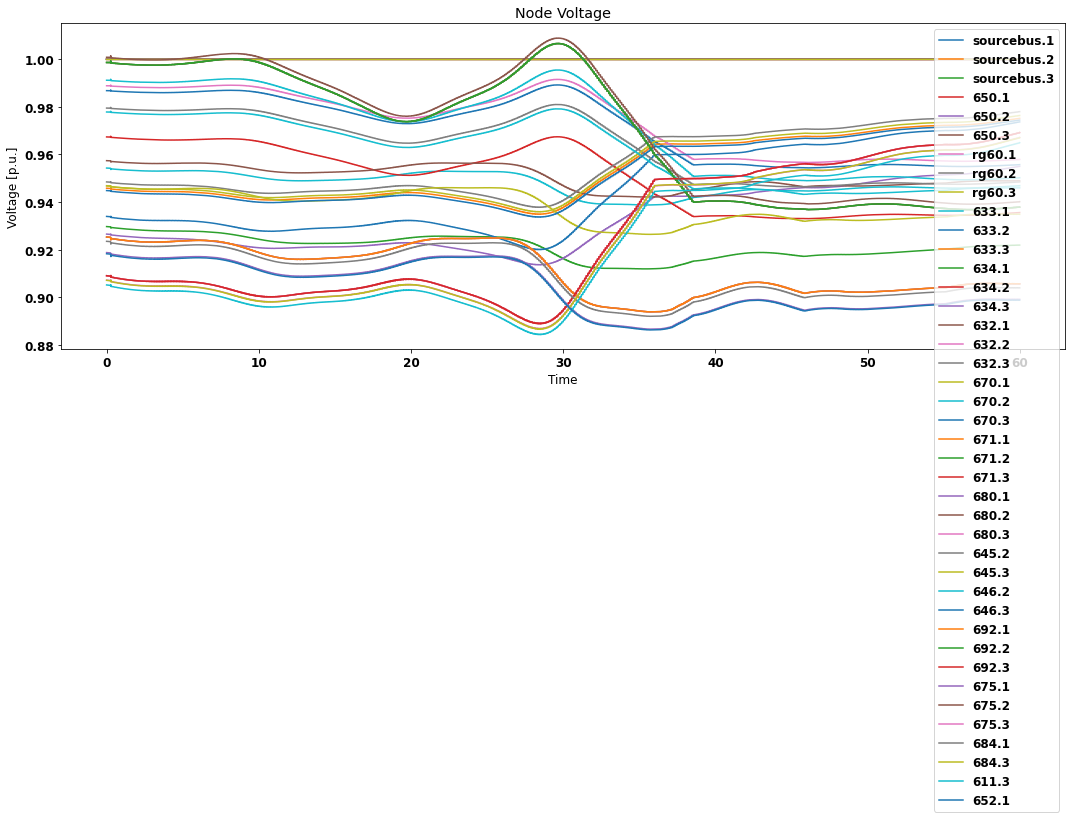

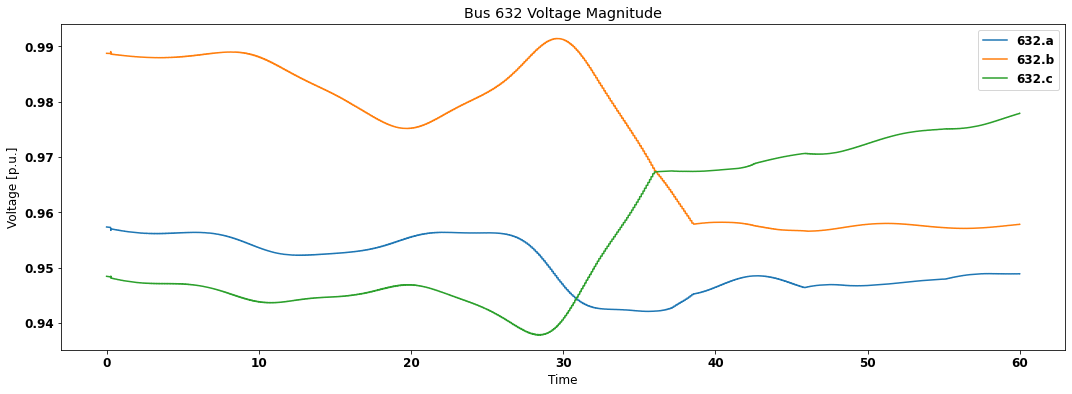

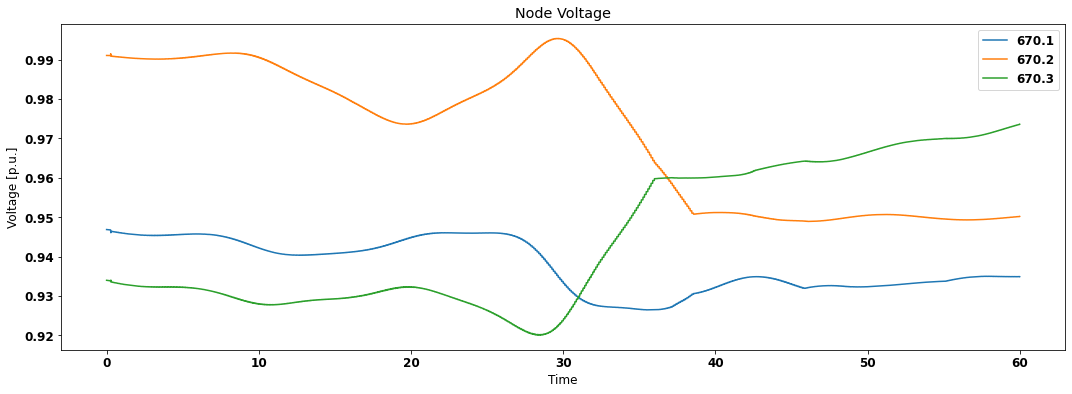

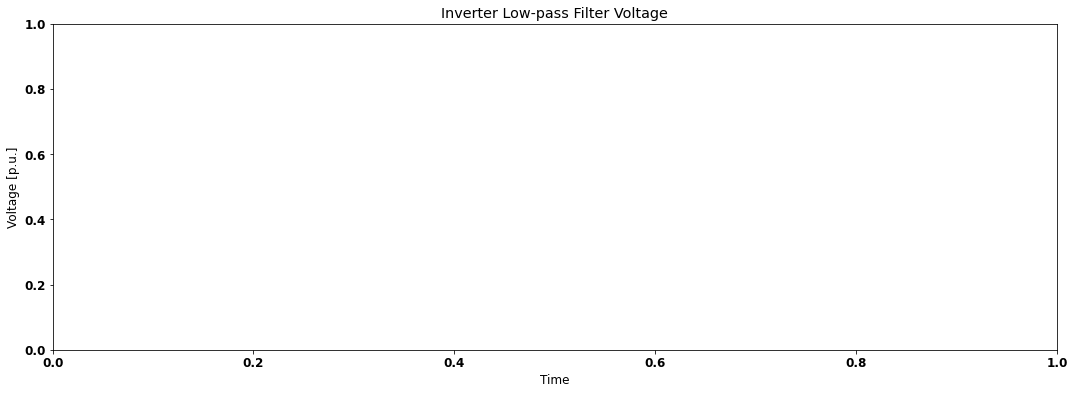

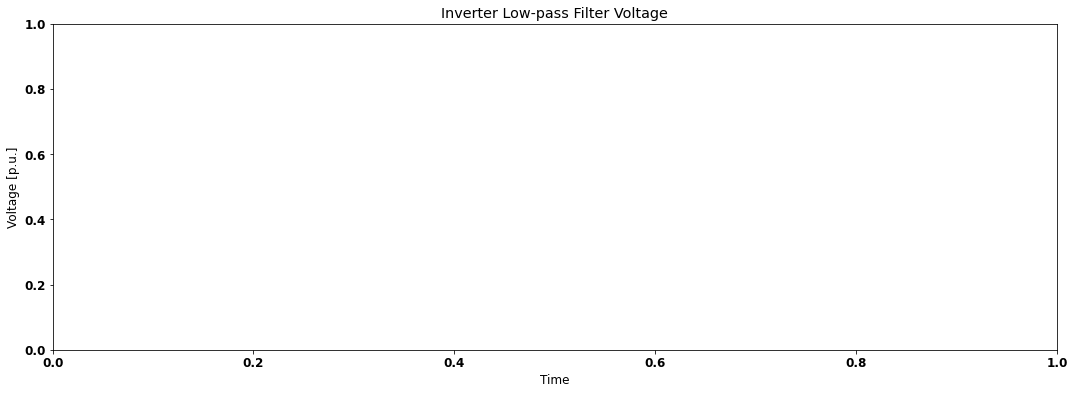

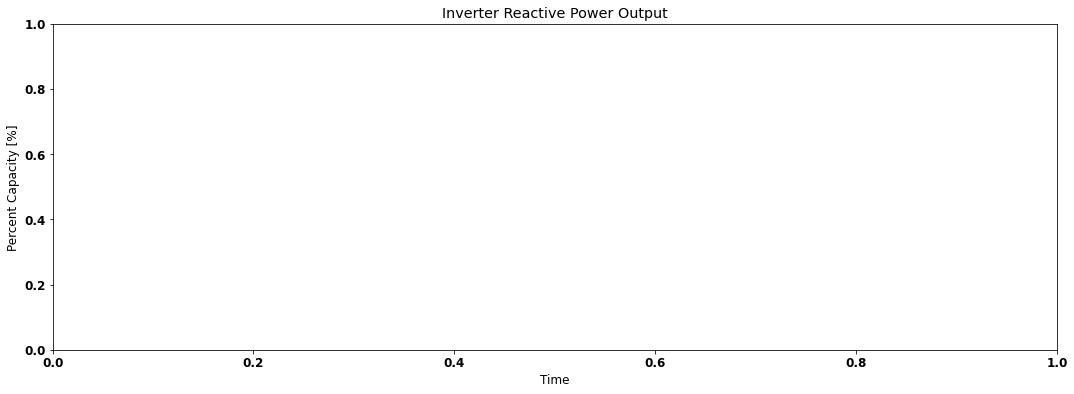

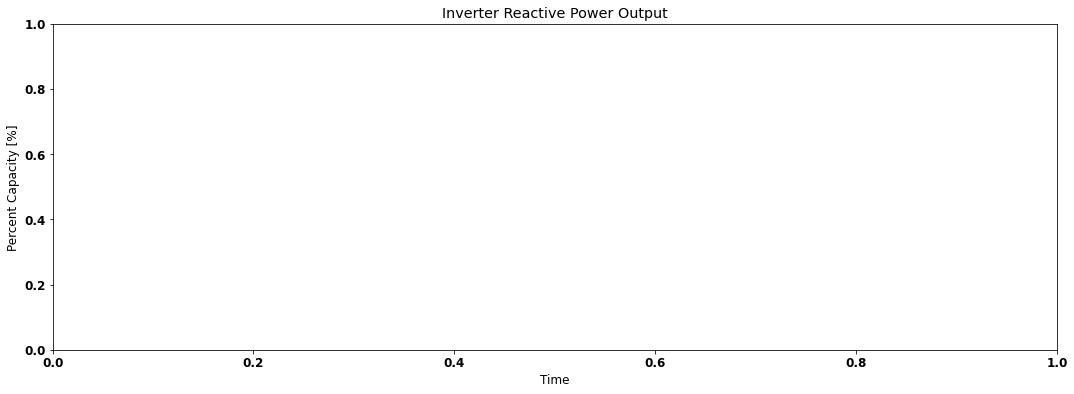

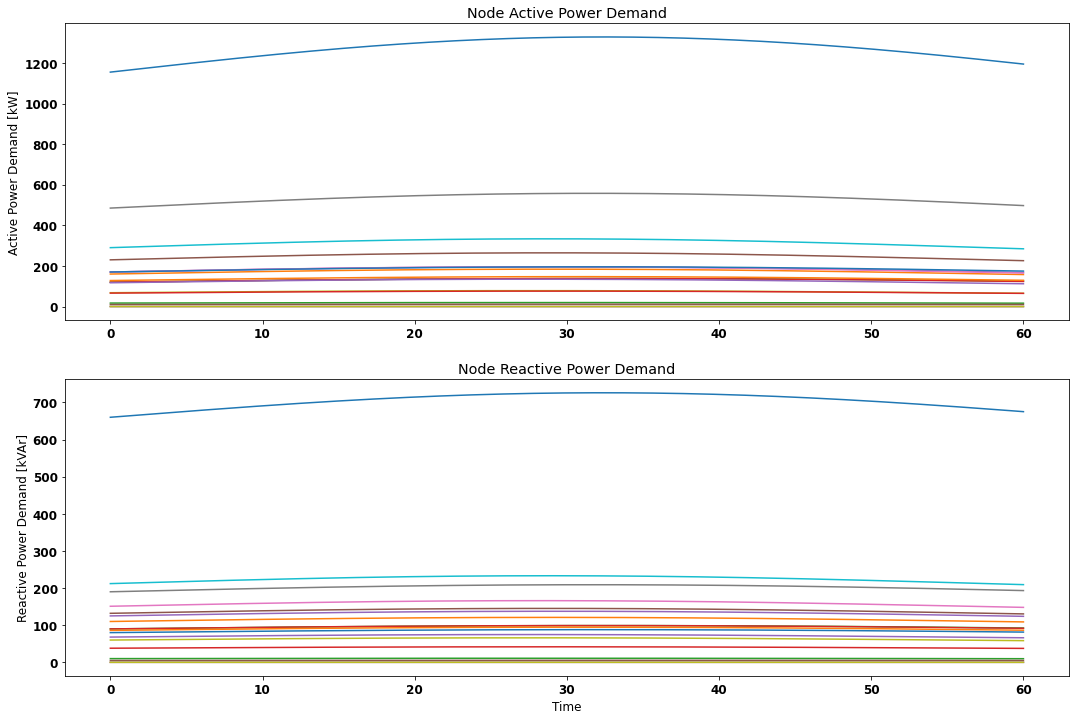

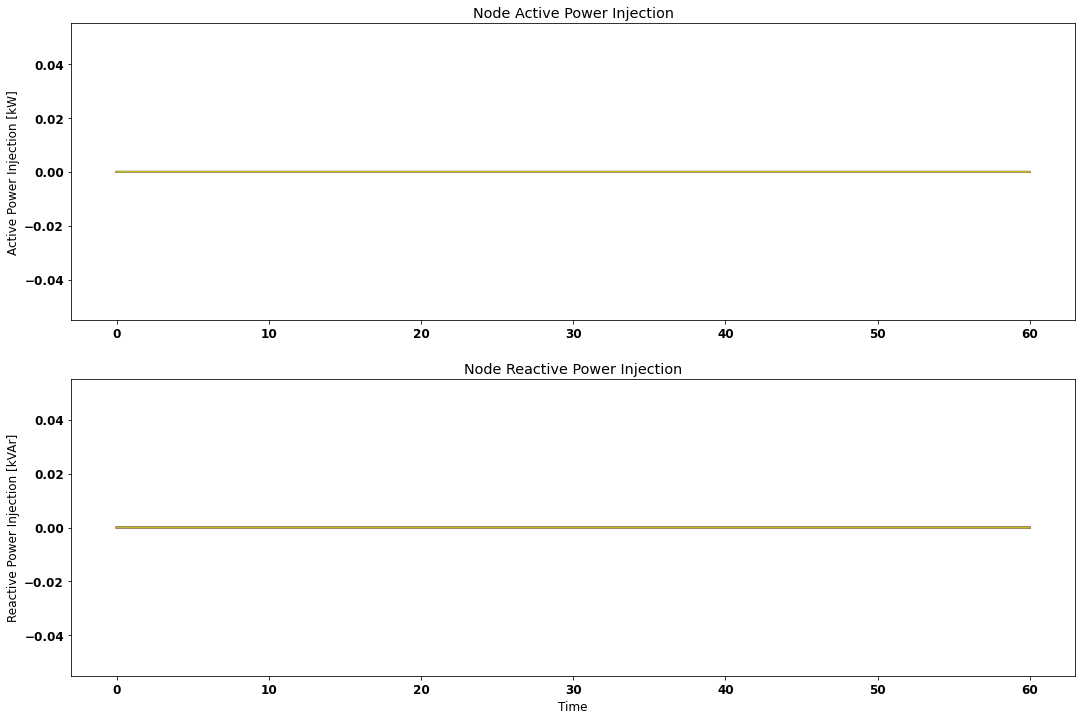

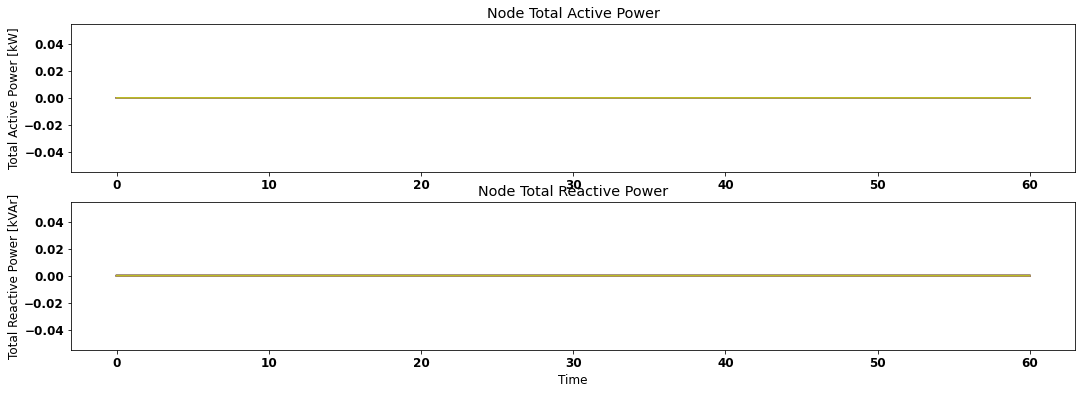

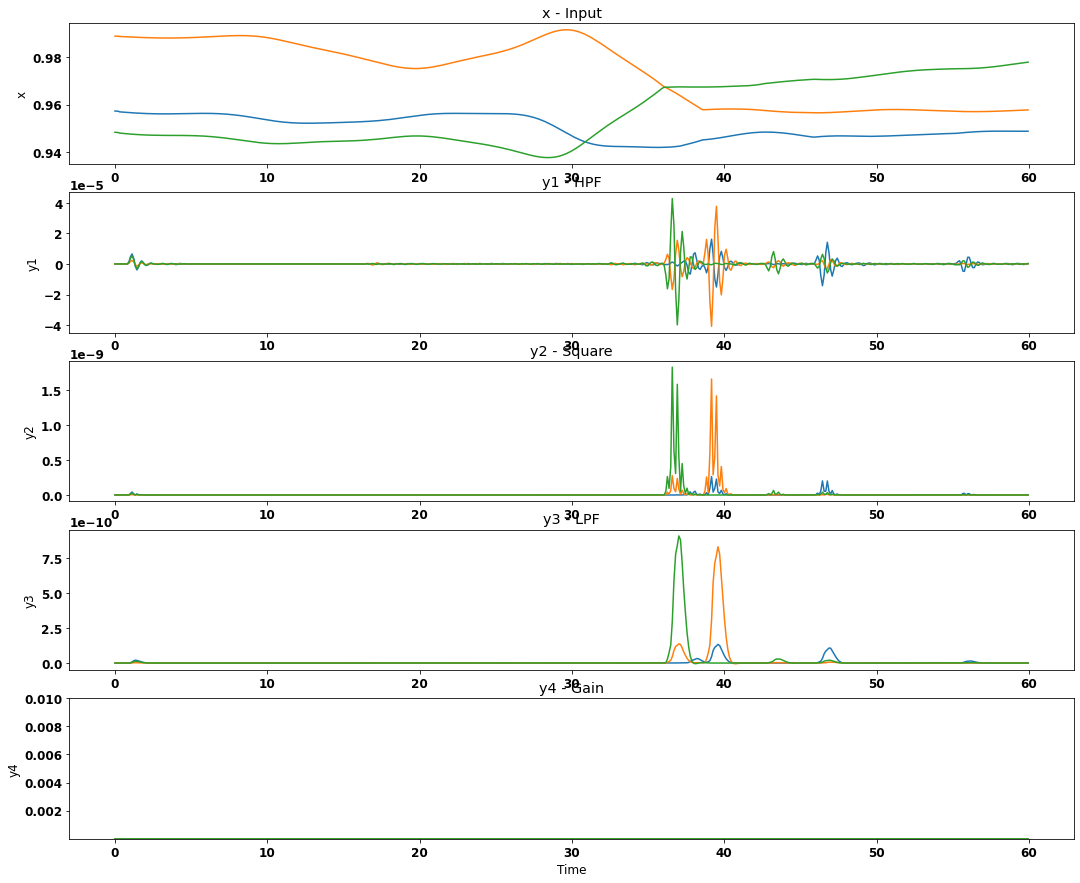

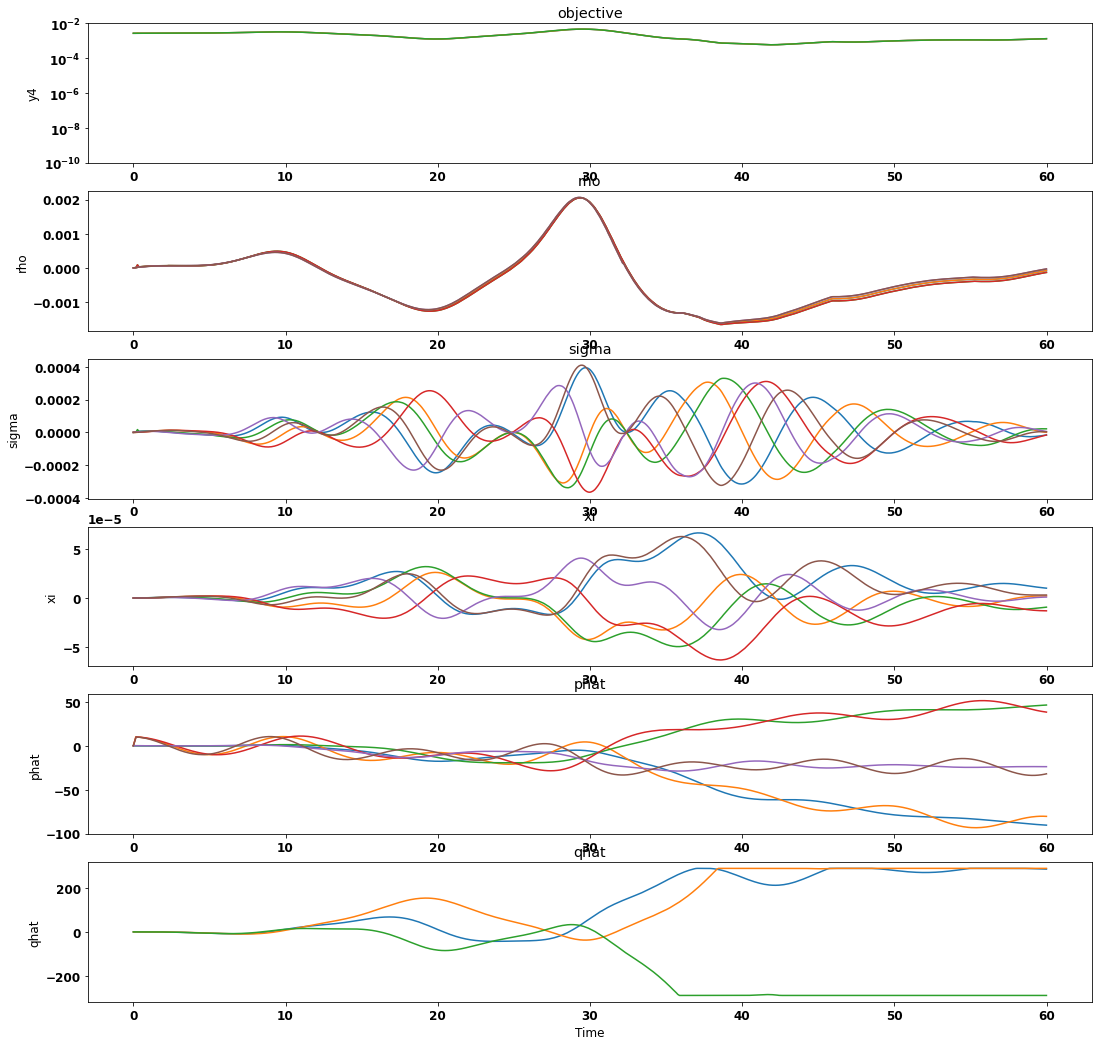

In [7]:
font = {'weight':'bold', 'size':12}

plt.rc('font', **font)

# plotStartTimeStep = 0
# plotEndTimeStep = len(time)

# # plotStartTimeStep = 12*3600 + 1
# # plotEndTimeStep = 12*3600 + 1 + 300

# # time = np.arange(plotStartTimeStep,plotEndTimeStep)

# # timehh = ((time-1)/3600).astype(int)
# # timemm = ((time-1) - 3600*timehh)/60

# # timeplot = timehh.astype(float) + timemm/100

# # fig = plt.figure(figsize=[18,6])
# # # for k1 in range(0,LoadBusVoltage.shape[1]):
# # for k1 in range(len(LoadBuses)):
# # #     plt.plot(time,LoadBusVoltage[:,k1])
# #     plt.plot(time,LoadBusVoltage[:,k1] - np.mean(LoadBusVoltage[:,k1]))
# # #     print(LoadBuses[k1])
# # plt.title('Node Voltage')
# # plt.xlabel('Time')
# # plt.ylabel('Voltage [p.u.]')
# # plt.show()

# # dss.Circuit.SetActiveBus(AllBuses[k1])
# #         tempVoltagePU = dss.Bus.puVmagAngle()[::2]
#         if dss.Bus.Nodes() == [1]:

##################################################
# Bus Voltage
##################################################

fig = plt.figure(figsize=[18,6])
for k1 in range(len(AllBuses)):
    dss.Circuit.SetActiveBus(AllBuses[k1])
    for ph in dss.Bus.Nodes():
        plt.plot(time,AllBusVoltage[:,ph-1,k1],label=AllBuses[k1]+'.'+str(ph))
plt.title('Node Voltage')
plt.xlabel('Time')
plt.ylabel('Voltage [p.u.]')
plt.legend()
plt.show()

fig = plt.figure(figsize=[18,6])
# plt.plot(time,AllBusVoltage[:,0,AllBuses.index('632')],label='632'+'.'+str(1))
# plt.plot(time,AllBusVoltage[:,1,AllBuses.index('632')],label='632'+'.'+str(2))
# plt.plot(time,AllBusVoltage[:,2,AllBuses.index('632')],label='632'+'.'+str(3))
plt.plot(time,AllBusVoltage[:,0,AllBuses.index('632')],label='632'+'.a')
plt.plot(time,AllBusVoltage[:,1,AllBuses.index('632')],label='632'+'.b')
plt.plot(time,AllBusVoltage[:,2,AllBuses.index('632')],label='632'+'.c')
plt.title('Bus 632 Voltage Magnitude')
plt.xlabel('Time')
plt.ylabel('Voltage [p.u.]')
plt.legend()
plt.show()

# fig.savefig('/home/michael/Desktop/temp/noreg_nocon_632_voltage.png')

fig = plt.figure(figsize=[18,6])
plt.plot(time,AllBusVoltage[:,0,AllBuses.index('670')],label='670'+'.'+str(1))
plt.plot(time,AllBusVoltage[:,1,AllBuses.index('670')],label='670'+'.'+str(2))
plt.plot(time,AllBusVoltage[:,2,AllBuses.index('670')],label='670'+'.'+str(3))
plt.title('Node Voltage')
plt.xlabel('Time')
plt.ylabel('Voltage [p.u.]')
plt.legend()
plt.show()

##################################################
# Inverters
##################################################

fig = plt.figure(figsize=[18,6])
for k1 in range(0,len(inverterlist)):
#     plt.plot(inverterlist[k1].Vmeas[:])
    # plt.plot(inverterlist[k1].timeop,inverterlist[k1].VBPhist[:],'--')
    # plt.plot(inverterlist[k1].timeop,inverterlist[k1].Vmeas[:],'-.')
    plt.plot(inverterlist[k1].timeop,inverterlist[k1].Vlp[:])
# plt.ylim([0.85, 1.05])
plt.title('Inverter Low-pass Filter Voltage')
plt.xlabel('Time')
plt.ylabel('Voltage [p.u.]')
plt.show()

fig = plt.figure(figsize=[18,6])
for k1 in range(0,len(inverterlist)):
#     plt.plot(inverterlist[k1].Vmeas[:])
    plt.plot(inverterlist[k1].timeop,inverterlist[k1].VBPhist[:],'--')
    plt.plot(inverterlist[k1].timeop,inverterlist[k1].Vmeas[:],'-.')
    plt.plot(inverterlist[k1].timeop,inverterlist[k1].Vlp[:])
# plt.ylim([0.85, 1.05])
plt.title('Inverter Low-pass Filter Voltage')
plt.xlabel('Time')
plt.ylabel('Voltage [p.u.]')
plt.show()

fig = plt.figure(figsize=[18,6])
for k1 in range(0,len(inverterlist)):
    plt.plot(inverterlist[k1].timeop,inverterlist[k1].reactive_power)
# plt.ylim([-100, 100])
plt.title('Inverter Reactive Power Output')
plt.xlabel('Time')
plt.ylabel('Percent Capacity [%]')
plt.show()

fig = plt.figure(figsize=[18,6])
for k1 in range(0,len(inverterlist)):
    plt.plot(inverterlist[k1].timeop,inverterlist[k1].qin)
# plt.ylim([-100, 100])
plt.title('Inverter Reactive Power Output')
plt.xlabel('Time')
plt.ylabel('Percent Capacity [%]')
plt.show()

##################################################
# Bus Power
##################################################

fig = plt.figure(figsize=[18,12])
plt.subplot(2,1,1)
plt.plot(time,PloadTS[:,:])
plt.title('Node Active Power Demand')
# plt.xlabel('Time')
plt.ylabel('Active Power Demand [kW]')
plt.subplot(2,1,2)
plt.plot(time,QloadTS[:,:])
plt.title('Node Reactive Power Demand')
plt.xlabel('Time')
plt.ylabel('Reactive Power Demand [kVAr]')
plt.show()

fig = plt.figure(figsize=[18,12])
plt.subplot(2,1,1)
plt.plot(time,PinvTS[:,:])
plt.title('Node Active Power Injection')
# plt.xlabel('Time')
plt.ylabel('Active Power Injection [kW]')
plt.subplot(2,1,2)
plt.plot(time,QinvTS[:,:])
plt.title('Node Reactive Power Injection')
plt.xlabel('Time')
plt.ylabel('Reactive Power Injection [kVAr]')
plt.show()

fig = plt.figure(figsize=[18,6])
plt.subplot(2,1,1)
plt.plot(time,PtotalTS[:,:])
plt.title('Node Total Active Power')
# plt.xlabel('Time')
plt.ylabel('Total Active Power [kW]')
plt.subplot(2,1,2)
plt.plot(time,QtotalTS[:,:])
plt.title('Node Total Reactive Power')
plt.xlabel('Time')
plt.ylabel('Total Reactive Power [kVAr]')
plt.show()

##################################################
# Voltage oscillation observer
##################################################

fig = plt.figure(figsize=[18,15])
plt.subplot(5,1,1)
for voo in voolist:
    plt.plot(voo.timeop,voo.x)
plt.title('x - Input')
# plt.xlabel('Time')
plt.ylabel('x')
plt.subplot(5,1,2)
for voo in voolist:
    plt.plot(voo.timeop,voo.y1)
plt.title('y1 - HPF')
# plt.xlabel('Time')
plt.ylabel('y1')
plt.subplot(5,1,3)
for voo in voolist:
    plt.plot(voo.timeop,voo.y2)
plt.title('y2 - Square')
plt.ylabel('y2')
plt.subplot(5,1,4)
for voo in voolist:
    plt.plot(voo.timeop,voo.y3)
plt.title('y3 - LPF')
plt.ylabel('y3')
plt.subplot(5,1,5)
for voo in voolist:
    plt.plot(voo.timeop,voo.y4)
plt.title('y4 - Gain')
plt.xlabel('Time')
plt.ylabel('y4')
plt.ylim([1e-12, 1e-2])
plt.show()

fig = plt.figure(figsize=[18,18])
plt.subplot(6,1,1)
for k1 in range(len(esclist)):
    plt.semilogy(esclist[k1].timeop,esclist[k1].psi)
plt.title('objective')
plt.ylabel('y4')
plt.ylim([1e-10, 1e-2])
plt.subplot(6,1,2)
for k1 in range(len(esclist)):
    plt.plot(esclist[k1].timeop,esclist[k1].rhop)
    plt.plot(esclist[k1].timeop,esclist[k1].rhoq)
plt.title('rho')
plt.ylabel('rho')
plt.subplot(6,1,3)
for k1 in range(len(esclist)):
    plt.plot(esclist[k1].timeop,esclist[k1].sigmap)
    plt.plot(esclist[k1].timeop,esclist[k1].sigmaq)
plt.title('sigma')
plt.ylabel('sigma')
plt.subplot(6,1,4)
for k1 in range(len(esclist)):
    plt.plot(esclist[k1].timeop,esclist[k1].xip)
    plt.plot(esclist[k1].timeop,esclist[k1].xiq)
plt.title('xi')
plt.ylabel('xi')
plt.subplot(6,1,5)
for k1 in range(len(esclist)):
    plt.plot(esclist[k1].timeop,esclist[k1].phat)
    plt.plot(esclist[k1].timeop,esclist[k1].p)
plt.title('phat')
plt.ylabel('phat')
plt.subplot(6,1,6)
for k1 in range(len(esclist)):
    plt.plot(esclist[k1].timeop,esclist[k1].qhat)
    # plt.plot(esclist[k1].timeop,esclist[k1].q)
plt.title('qhat')
plt.xlabel('Time')
plt.ylabel('qhat')
plt.show()


In [8]:
# from scipy import signal
# import matplotlib.pyplot as plt

# fs = 100
# N = len(time)

# fig = plt.figure(figsize=[18,6])
# for k1 in range(AllBusVoltage.shape[1]):
#     x = AllBusVoltage[:,k1]
#     f, Pxx_den = signal.periodogram(x, fs)
#     plt.semilogy(f, Pxx_den)
#     plt.xlim([0, 3])
#     plt.ylim([1e-10, 1e-2])
#     plt.xlabel('frequency [Hz]')
#     plt.ylabel('PSD [V**2/Hz]')
# plt.show()

In [9]:
inverter_params = pd.read_csv('inverter_params.csv',header=0,index_col=0)

inverter_params['Toff'] = 1/100*np.floor(10*np.random.rand(inverter_params.shape[0]))

inverter_params['Toff'].loc[2]

0.06

In [10]:
for k1 in range(len(AllBuses)):
    dss.Circuit.SetActiveBus(AllBuses[k1])
    print(dss.Bus.Name())
    print(dss.Bus.Nodes())
    print(dss.Bus.kVBase())
    print(dss.Bus.puVmagAngle()[::2])
    print('')

sourcebus
[1, 2, 3]
66.39528095680697
[0.9998400634332089, 0.9998938636103897, 0.999853054848023]

650
[1, 2, 3]
2.4017771198288433
[0.9997811783240858, 0.9998301098718098, 0.9998597777646122]

rg60
[1, 2, 3]
2.4017771198288433
[0.9996611545736772, 0.9997255337619516, 0.9997621755894925]

633
[1, 2, 3]
2.4017771198288433
[0.9459353317737584, 0.9556500522103942, 0.9750639351762246]

634
[1, 2, 3]
0.27712812921102037
[0.9219543267864985, 0.9355899477750192, 0.9549669882333178]

632
[1, 2, 3]
2.4017771198288433
[0.9488689168942678, 0.9578231164960828, 0.9778765103105261]

670
[1, 2, 3]
2.4017771198288433
[0.9348818299618321, 0.95017277387411, 0.9735731574230876]

671
[1, 2, 3]
2.4017771198288433
[0.9057291630013192, 0.9378772643193929, 0.9690859585541084]

680
[1, 2, 3]
2.4017771198288433
[0.905729174552349, 0.9378772772805897, 0.9690859726763282]

645
[2, 3]
2.4017771198288433
[0.9484228682881866, 0.9762524872068035]

646
[2, 3]
2.4017771198288433
[0.9468280795097689, 0.9743388886283102]

In [11]:
for k1 in range(len(dss.Loads.AllNames())):
    dss.Loads.Name(dss.Loads.AllNames()[k1])
    dss.CktElement.AllPropertyNames()
    print(dss.Loads.Name())
    print(dss.Loads.IsDelta())
    print(dss.CktElement.BusNames()[0].split('.',1))
    print(dss.Loads.IsDelta())
    print(dss.CktElement.NodeOrder())    
    print(dss.Loads.kV())
    print(dss.Loads.kVABase())
    print(dss.Loads.kW())
    print(dss.Loads.kvar()) 
    print(dss.CktElement.Powers())
    print('')

load_671
True
['671', '1.2.3']
True
[1, 2, 3]
4.16
1372.2196090668465
1194.6608804974815
675.1089068561835
[358.7034242423882, 214.63090802337746, 392.3794510913049, 214.98520292672822, 400.86779655112457, 221.36072969148327]

load_634a
False
['634', '1']
False
[1, 0]
0.277
191.43976187686587
157.48481747717216
108.84720801037057
[147.97938471582916, 102.27739174041307, 0.0, 0.0]

load_634b
False
['634', '2']
False
[2, 0]
0.277
155.25281407982632
124.7726179604825
92.38630898024124
[120.93207119958268, 89.54276095891213, 0.0, 0.0]

load_634c
False
['634', '3']
False
[3, 0]
0.277
153.7598325598765
123.4166492240633
91.70832461203165
[123.41707313448696, 91.70937926498117, 0.0, 0.0]

load_645
False
['645', '2']
False
[2, 0]
2.4
208.53110990954013
167.73835792317922
123.89135192312708
[167.41271623626406, 123.6510496373675, 0.0, 0.0]

load_646
True
['646', '2.3']
True
[2, 3]
4.16
260.7729946237605
225.82642127573774
130.40315248810836
[137.10707807662453, -0.8182649869969318, 71.805068192

In [12]:
print(dss.Circuit.AllBusNames())
AllBusVoltage[0,:,1]

['sourcebus', '650', 'rg60', '633', '634', '632', '670', '671', '680', '645', '646', '692', '675', '684', '611', '652']


array([0.99982072, 0.99986787, 0.99983564])

In [13]:
kt

6000

In [14]:
# fig = plt.figure(figsize=[18,9])
# plt.subplot(2,1,1)
# plt.plot(time,AllBusVoltage[:,0,AllBuses.index('632')],label='632'+'.a')
# plt.plot(time,AllBusVoltage[:,1,AllBuses.index('632')],label='632'+'.b')
# plt.plot(time,AllBusVoltage[:,2,AllBuses.index('632')],label='632'+'.c')
# plt.title('Bus 632 Voltage Magnitude')

# plt.ylabel('Voltage [p.u.]')
# plt.legend()
# plt.subplot(2,1,2)
# plt.semilogy(voolist[0].timeop,voolist[0].y4,label='VOO a')
# plt.semilogy(voolist[1].timeop,voolist[1].y4,label='VOO b')
# plt.semilogy(voolist[2].timeop,voolist[2].y4,label='VOO c')
# plt.semilogy(voolist[2].timeop,voolist[0].y4+voolist[1].y4+voolist[2].y4,label='Total')
# plt.title('Voltage Oscillations')
# plt.xlabel('Time [sec]')
# plt.ylabel('Voltage Oscillation Energy')
# plt.ylim([1e-6, 1e-2])
# plt.legend()
# # plt.subplot(3,1,2)
# # for k1 in range(len(esclist)):
# #     plt.plot(esclist[k1].timeop,esclist[k1].q)
# # plt.title('q')
# # plt.xlabel('Time')
# # plt.ylabel('q')

# plt.show()

# fig.savefig('/home/michael/Desktop/temp/reg_nocon_632_01.png')

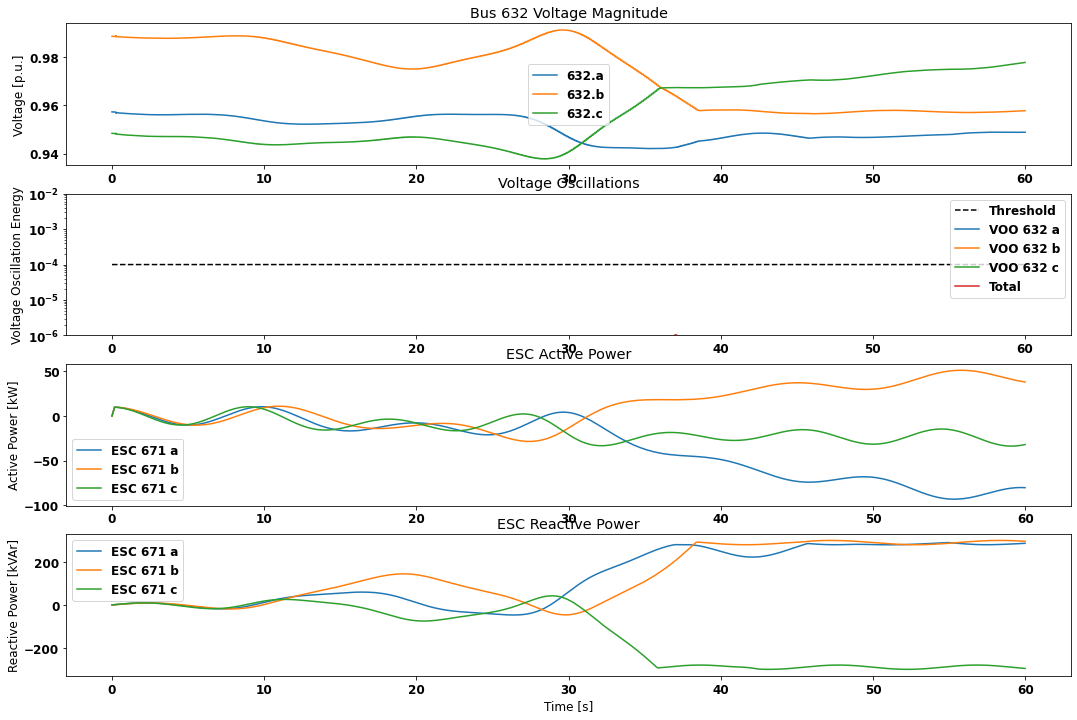

In [15]:
fig = plt.figure(figsize=[18,12])
plt.subplot(4,1,1)
plt.plot(time,AllBusVoltage[:,0,AllBuses.index('632')],label='632'+'.a')
plt.plot(time,AllBusVoltage[:,1,AllBuses.index('632')],label='632'+'.b')
plt.plot(time,AllBusVoltage[:,2,AllBuses.index('632')],label='632'+'.c')
plt.title('Bus 632 Voltage Magnitude')
plt.ylabel('Voltage [p.u.]')
plt.legend()
plt.subplot(4,1,2)
plt.semilogy(time,1e-4*np.ones(len(time)),'k--',label='Threshold')
plt.semilogy(voolist[0].timeop,voolist[0].y4,label='VOO 632 a')
plt.semilogy(voolist[1].timeop,voolist[1].y4,label='VOO 632 b')
plt.semilogy(voolist[2].timeop,voolist[2].y4,label='VOO 632 c')
plt.semilogy(voolist[2].timeop,voolist[0].y4+voolist[1].y4+voolist[2].y4,label='Total')
plt.title('Voltage Oscillations')
# plt.xlabel('Time [sec]')
plt.ylabel('Voltage Oscillation Energy')
plt.ylim([1e-6, 1e-2])
plt.legend()
plt.subplot(4,1,3)
plt.plot(esclist[0].timeop,esclist[0].p,label='ESC 671 a')
plt.plot(esclist[1].timeop,esclist[1].p,label='ESC 671 b')
plt.plot(esclist[2].timeop,esclist[2].p,label='ESC 671 c')
plt.title('ESC Active Power')
plt.ylabel('Active Power [kW]')
plt.legend()
plt.subplot(4,1,4)
plt.plot(esclist[0].timeop,esclist[0].q,label='ESC 671 a')
plt.plot(esclist[1].timeop,esclist[1].q,label='ESC 671 b')
plt.plot(esclist[2].timeop,esclist[2].q,label='ESC 671 c')
plt.title('ESC Reactive Power')
plt.xlabel('Time [s]')
plt.ylabel('Reactive Power [kVAr]')
plt.legend()

plt.show()

# fig.savefig('/home/michael/Desktop/temp/reg_con_632_02.png')